https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification/data

# Data Dictionary

## [Link to dataset](https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification/data)

<div style="text-align:center;border-radius:60px 100px; padding:10px">

|       | **Attribute**   | **Information**                                                                 |
|-------|-----------------|---------------------------------------------------------------------------------|
| **1** | model           | Ford Car Brands                                                                |
| **2** | year            | Production Year                                                                |
| **3** | price           | Price of car in $                                                              |
| **4** | transmission    | Automatic, Manual, Semi-Auto                                                   |
| **5** | mileage         | Number of miles traveled                                                       |
| **6** | fuel_Type       | Petrol, Diesel, Hybrid, Electric, Other                                        |
| **7** | tax             | Annual Tax                                                                     |
| **8** | mpg             | Miles per Gallon                                                               |
| **9** | engineSize      | Car's Engine Size                                                              |

</div>

# Import libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mobile-price-classification/train.csv
/kaggle/input/mobile-price-classification/test.csv


In [2]:
!pip install imbalanced-learn==0.10.1 # This covers the imblearn installations

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D # For 3D plotting
from matplotlib import cm # For colormaps if needed for 3D plots

from sklearn import svm
from sklearn.svm import SVC, NuSVC, LinearSVC, SVR, LinearSVR, NuSVR # Combined all SVM models
from sklearn.inspection import DecisionBoundaryDisplay # For plotting decision boundaries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.datasets import make_classification # For example, if generating dummy data

from imblearn.over_sampling import SMOTE # From imbalanced-learn

import optuna
import warnings

warnings.filterwarnings('ignore') # Keep this if you want to ignore warnings globally

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 8.8 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.13.0
    Uninstalling imbalanced-learn-0.13.0:
      Successfully uninstalled imbalanced-learn-0.13.0


# Load Dataset

In [3]:
data = pd.read_csv('/kaggle/input/mobile-price-classification/train.csv')
df=data.copy()
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [4]:
# Get the total number of rows in the DataFrame
total_rows = len(df)

# Calculate the number of rows for a 50% sample
sample_size = int(0.10 * total_rows)

# Randomly sample 50% of the rows
df = df.sample(n=sample_size, random_state=42) # random_state for reproducibility

# Split data into train and test dataset

In [5]:
pd.set_option('display.max_columns', None)

# Split the data into training and testing sets
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42) 

# Print the shapes of the resulting sets
#print("X_train shape:", x_train.shape)
print("df_train shape:", df_train.shape)
#print("X_test shape:", x_test.shape)
print("df_test shape:", df_test.shape)

df_train shape: (160, 21)
df_test shape: (40, 21)


# Data visualization

## Basic Statistics

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, 1819 to 429
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  160 non-null    int64  
 1   blue           160 non-null    int64  
 2   clock_speed    160 non-null    float64
 3   dual_sim       160 non-null    int64  
 4   fc             160 non-null    int64  
 5   four_g         160 non-null    int64  
 6   int_memory     160 non-null    int64  
 7   m_dep          160 non-null    float64
 8   mobile_wt      160 non-null    int64  
 9   n_cores        160 non-null    int64  
 10  pc             160 non-null    int64  
 11  px_height      160 non-null    int64  
 12  px_width       160 non-null    int64  
 13  ram            160 non-null    int64  
 14  sc_h           160 non-null    int64  
 15  sc_w           160 non-null    int64  
 16  talk_time      160 non-null    int64  
 17  three_g        160 non-null    int64  
 18  touch_screen

In [7]:
df_train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [8]:
df_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.00000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,1166.806250,0.543750,1.501875,0.537500,4.800000,0.481250,31.512500,0.480625,138.906250,4.537500,10.300000,602.331250,1223.737500,2071.431250,12.806250,6.11250,10.812500,0.712500,0.456250,0.462500,1.400000
std,412.889107,0.499646,0.786559,0.500157,4.366539,0.501217,18.183892,0.291061,35.024124,2.206017,6.425969,414.427873,442.655487,1085.122366,3.951748,4.37688,5.189718,0.454018,0.499646,0.500157,1.144854
min,508.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,52.000000,522.000000,282.000000,5.000000,0.00000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,822.250000,0.000000,0.700000,0.000000,1.000000,0.000000,15.000000,0.200000,109.750000,3.000000,4.000000,263.500000,819.750000,1103.250000,10.000000,2.00000,7.000000,0.000000,0.000000,0.000000,0.000000
50%,1119.500000,1.000000,1.500000,1.000000,3.000000,0.000000,28.000000,0.500000,138.000000,4.000000,10.000000,547.000000,1240.500000,2105.000000,13.000000,6.00000,11.000000,1.000000,0.000000,0.000000,1.000000
75%,1488.250000,1.000000,2.125000,1.000000,8.000000,1.000000,46.000000,0.700000,166.000000,6.000000,16.000000,892.000000,1610.500000,2974.500000,16.000000,9.00000,15.000000,1.000000,1.000000,1.000000,2.000000
max,1986.000000,1.000000,3.000000,1.000000,17.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1765.000000,1997.000000,3993.000000,19.000000,17.00000,20.000000,1.000000,1.000000,1.000000,3.000000


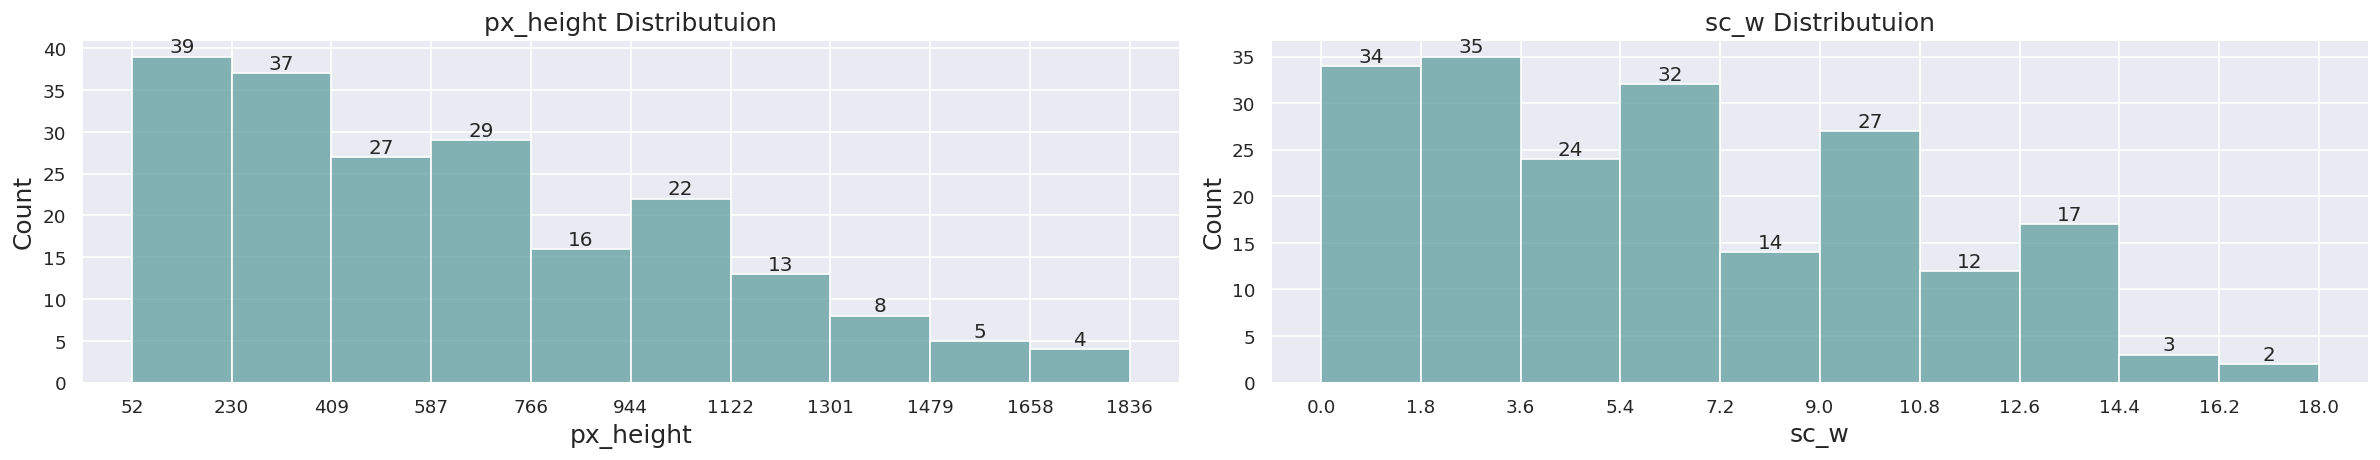

In [9]:
sns.set(rc = {'axes.labelsize' : 15})               
fig, ax = plt.subplots(1, 2, figsize=(20,4), dpi=120)
_, bin_edges = np.histogram(df['px_height'], range=(np.floor(df['px_height'].min()), np.ceil(df['px_height'].max())))                                     
g1 = sns.histplot(x='px_height', data=df, bins=bin_edges, color='cadetblue', ax=ax[0])
ax[0].set_xticks(np.round(bin_edges,1))
ax[0].set_title('px_height Distributuion', fontsize=15) 
for cont in g1.containers:
        g1.bar_label(cont)
_, bin_edges = np.histogram(df['sc_w'], range=(np.floor(df['sc_w'].min()), np.ceil(df['sc_w'].max())))
g2 = sns.histplot(x='sc_w', data=df, bins=bin_edges, color='cadetblue', ax=ax[1])
ax[1].set_xticks(np.round(bin_edges,1))
ax[1].set_title('sc_w Distributuion', fontsize=15)      
for cont in g2.containers:
        g2.bar_label(cont)
        
plt.tight_layout()
plt.show()

## Distribution of target columns

In [10]:
df_train['price_range'].value_counts(normalize=True)

price_range
0    0.30000
2    0.23750
1    0.23125
3    0.23125
Name: proportion, dtype: float64

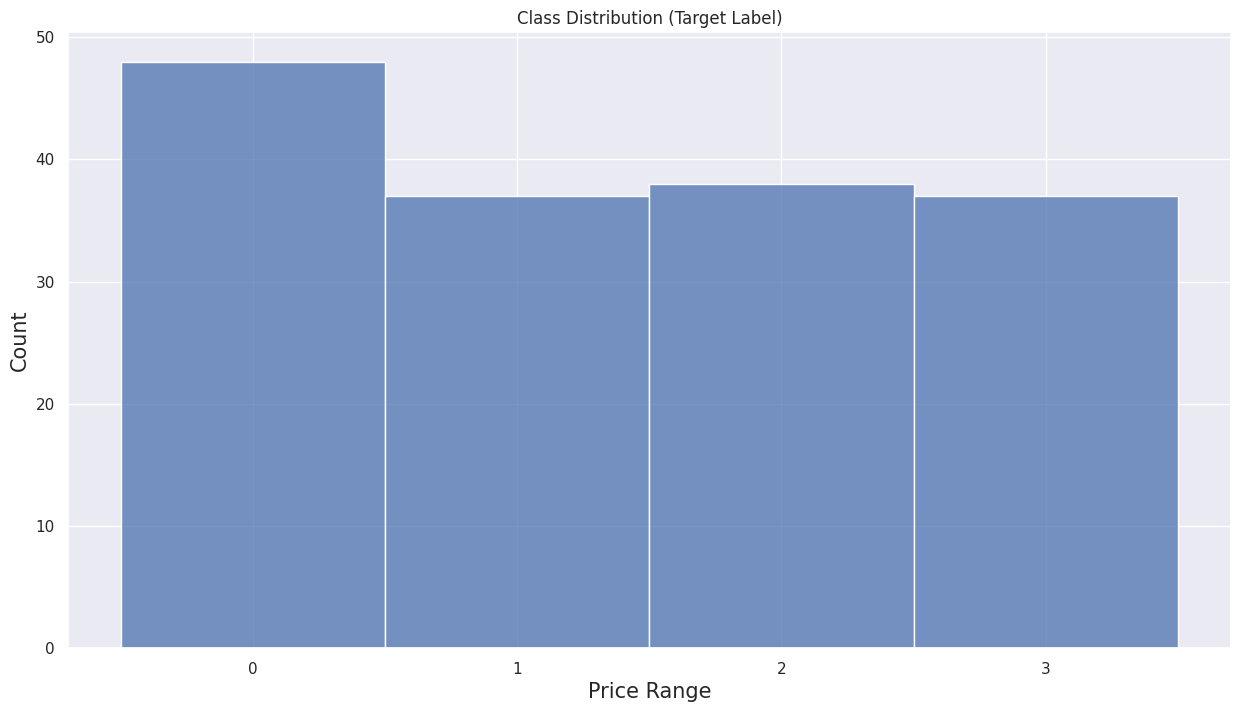

In [11]:
# Histogram for price range distribution
plt.figure(figsize=(15, 8))
sns.histplot(df_train['price_range'], discrete=True, stat='count')
plt.title('Class Distribution (Target Label)')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.xticks(df_train['price_range'].unique()) # Ensure all price range categories are displayed on x-axis
plt.show()

## Correlation Analysis

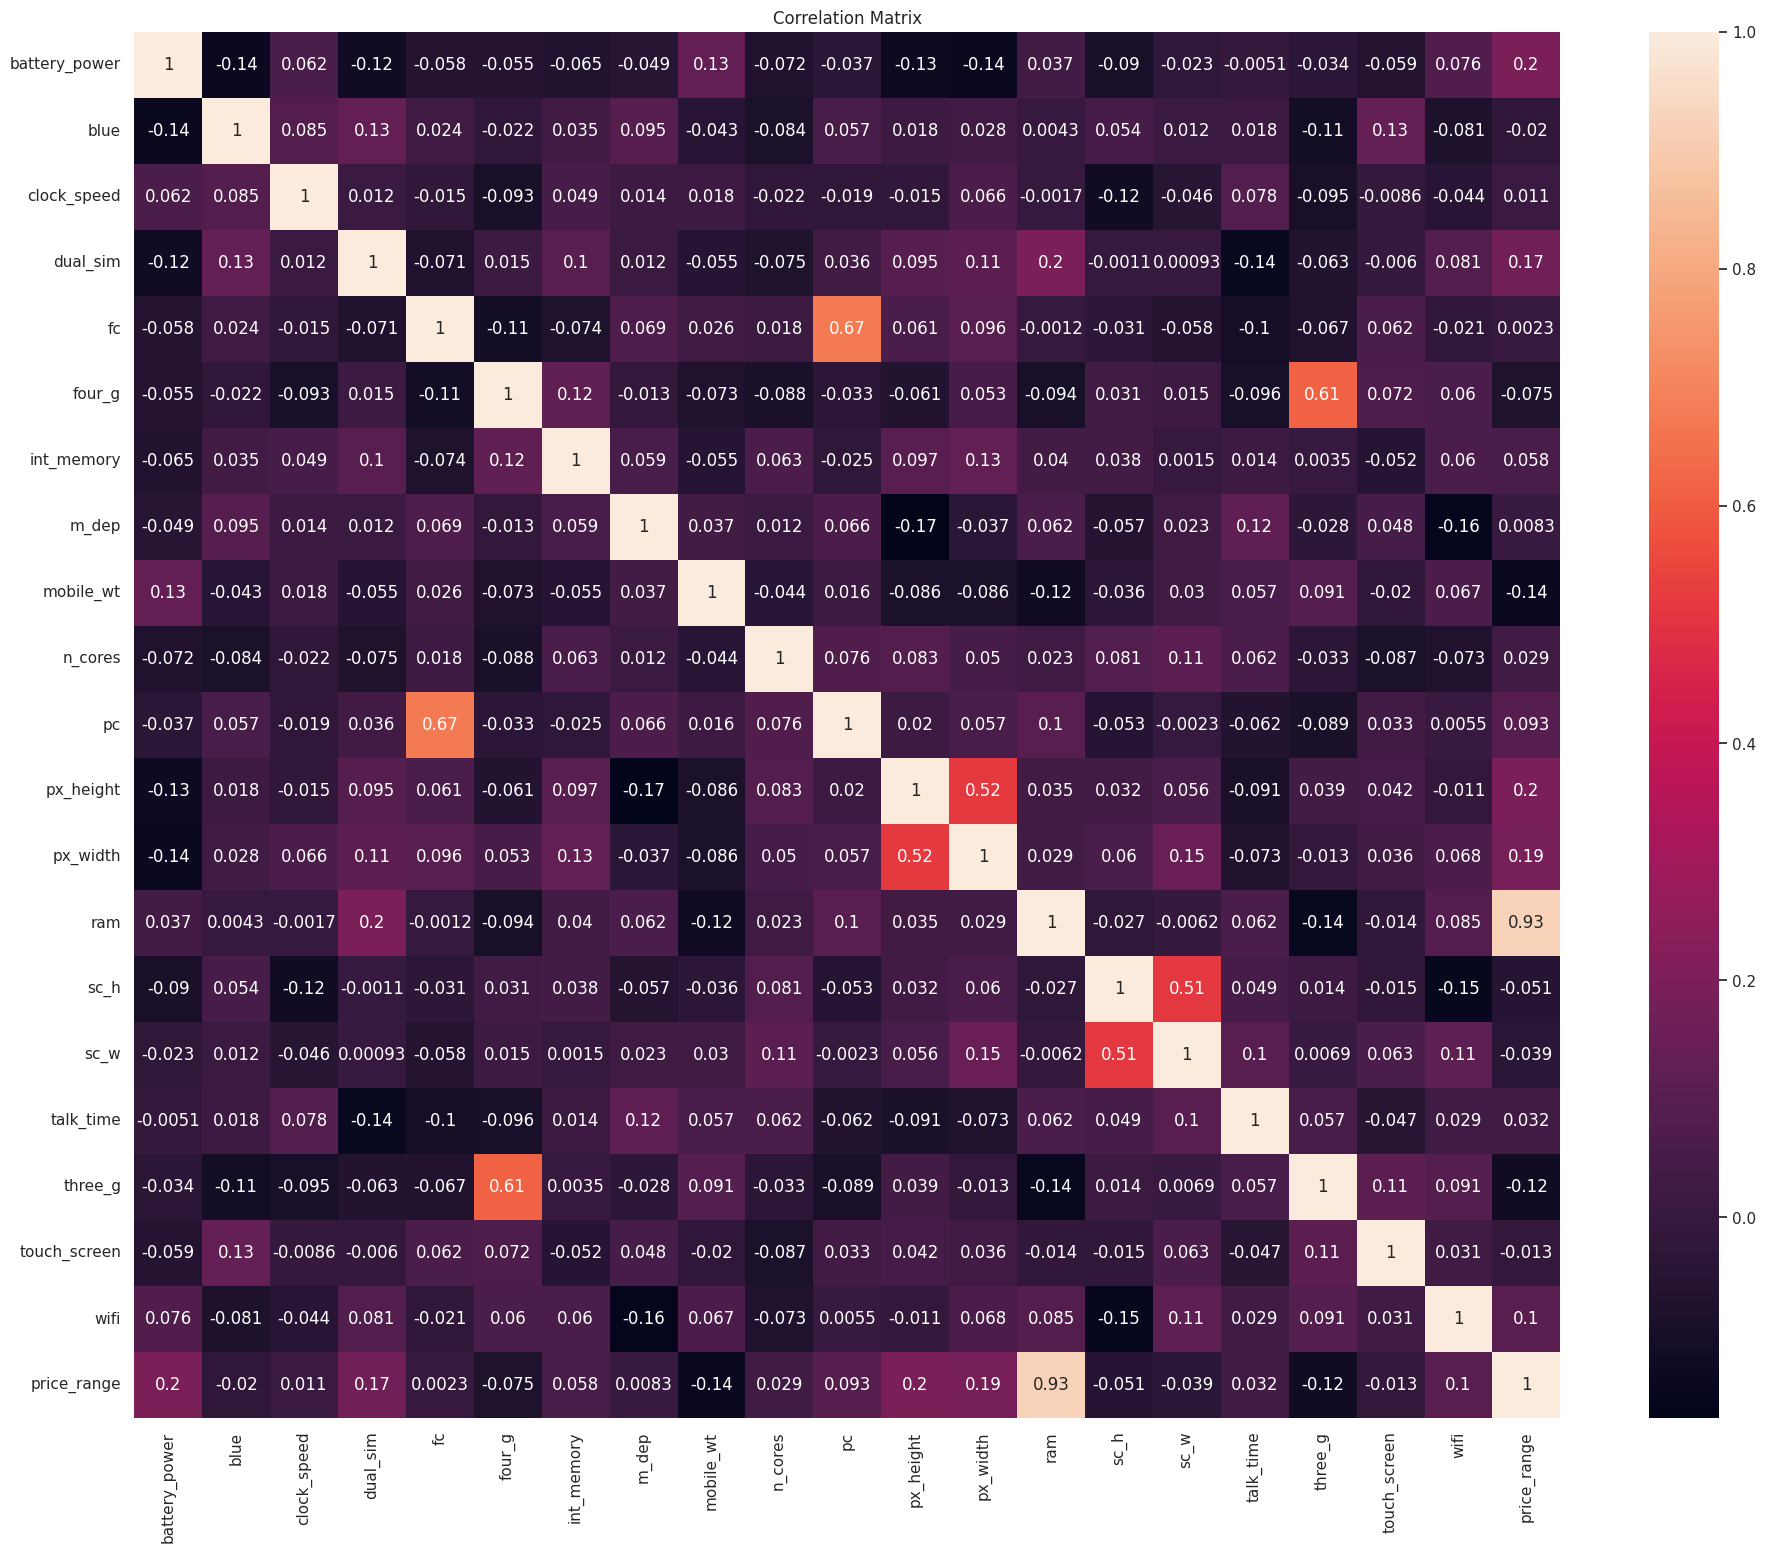

In [12]:
correlation_matrix = df_train.corr(method='pearson')
plt.figure(figsize=(23, 18))
sns.heatmap(correlation_matrix, annot=True,cmap='rocket') 
plt.title('Correlation Matrix')
plt.show()

In [13]:
# Extract correlations with the target variable 'price_range'
target_correlations = correlation_matrix['price_range'].sort_values(ascending=False)
print("\nCorrelations with Target 'price_range':")
print(target_correlations.round(2))


Correlations with Target 'price_range':
price_range      1.00
ram              0.93
battery_power    0.20
px_height        0.20
px_width         0.19
dual_sim         0.17
wifi             0.10
pc               0.09
int_memory       0.06
talk_time        0.03
n_cores          0.03
clock_speed      0.01
m_dep            0.01
fc               0.00
touch_screen    -0.01
blue            -0.02
sc_w            -0.04
sc_h            -0.05
four_g          -0.07
three_g         -0.12
mobile_wt       -0.14
Name: price_range, dtype: float64


# Feature Engineer

## Drop noise columns

In [14]:
columns_to_drop = ['clock_speed', 'mobile_wt', 'touch_screen']

# Drop columns from df_train
df_train = df_train.drop(columns=columns_to_drop, errors='ignore')

# Drop columns from df_test
df_test = df_test.drop(columns=columns_to_drop, errors='ignore')

# Verify the columns were dropped (optional)
print("Columns in df_train after dropping:", df_train.columns)
print("Columns in df_test after dropping:", df_test.columns)

Columns in df_train after dropping: Index(['battery_power', 'blue', 'dual_sim', 'fc', 'four_g', 'int_memory',
       'm_dep', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time', 'three_g', 'wifi', 'price_range'],
      dtype='object')
Columns in df_test after dropping: Index(['battery_power', 'blue', 'dual_sim', 'fc', 'four_g', 'int_memory',
       'm_dep', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time', 'three_g', 'wifi', 'price_range'],
      dtype='object')


## Split feature and target labels

In [15]:
y_train = df_train['price_range'] 
x_train = df_train.drop('price_range', axis=1) 
y_test = df_test['price_range'] 
x_test = df_test.drop('price_range', axis=1) 

# Print the shapes of the resulting sets
print("X_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (160, 17)
y_train shape: (160,)
X_test shape: (40, 17)
y_test shape: (40,)


## Dimensionality Reduction

In [16]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions.  Adjust as needed.
x_train = pca.fit_transform(x_train) # Use the encoded data
x_test = pca.transform(x_test)    # Use the encoded data
print("Shape of original x_train:", x_train.shape)
print("Shape of original y_train:", x_test.shape)

Shape of original x_train: (160, 2)
Shape of original y_train: (40, 2)


## Visualize data before oversampling

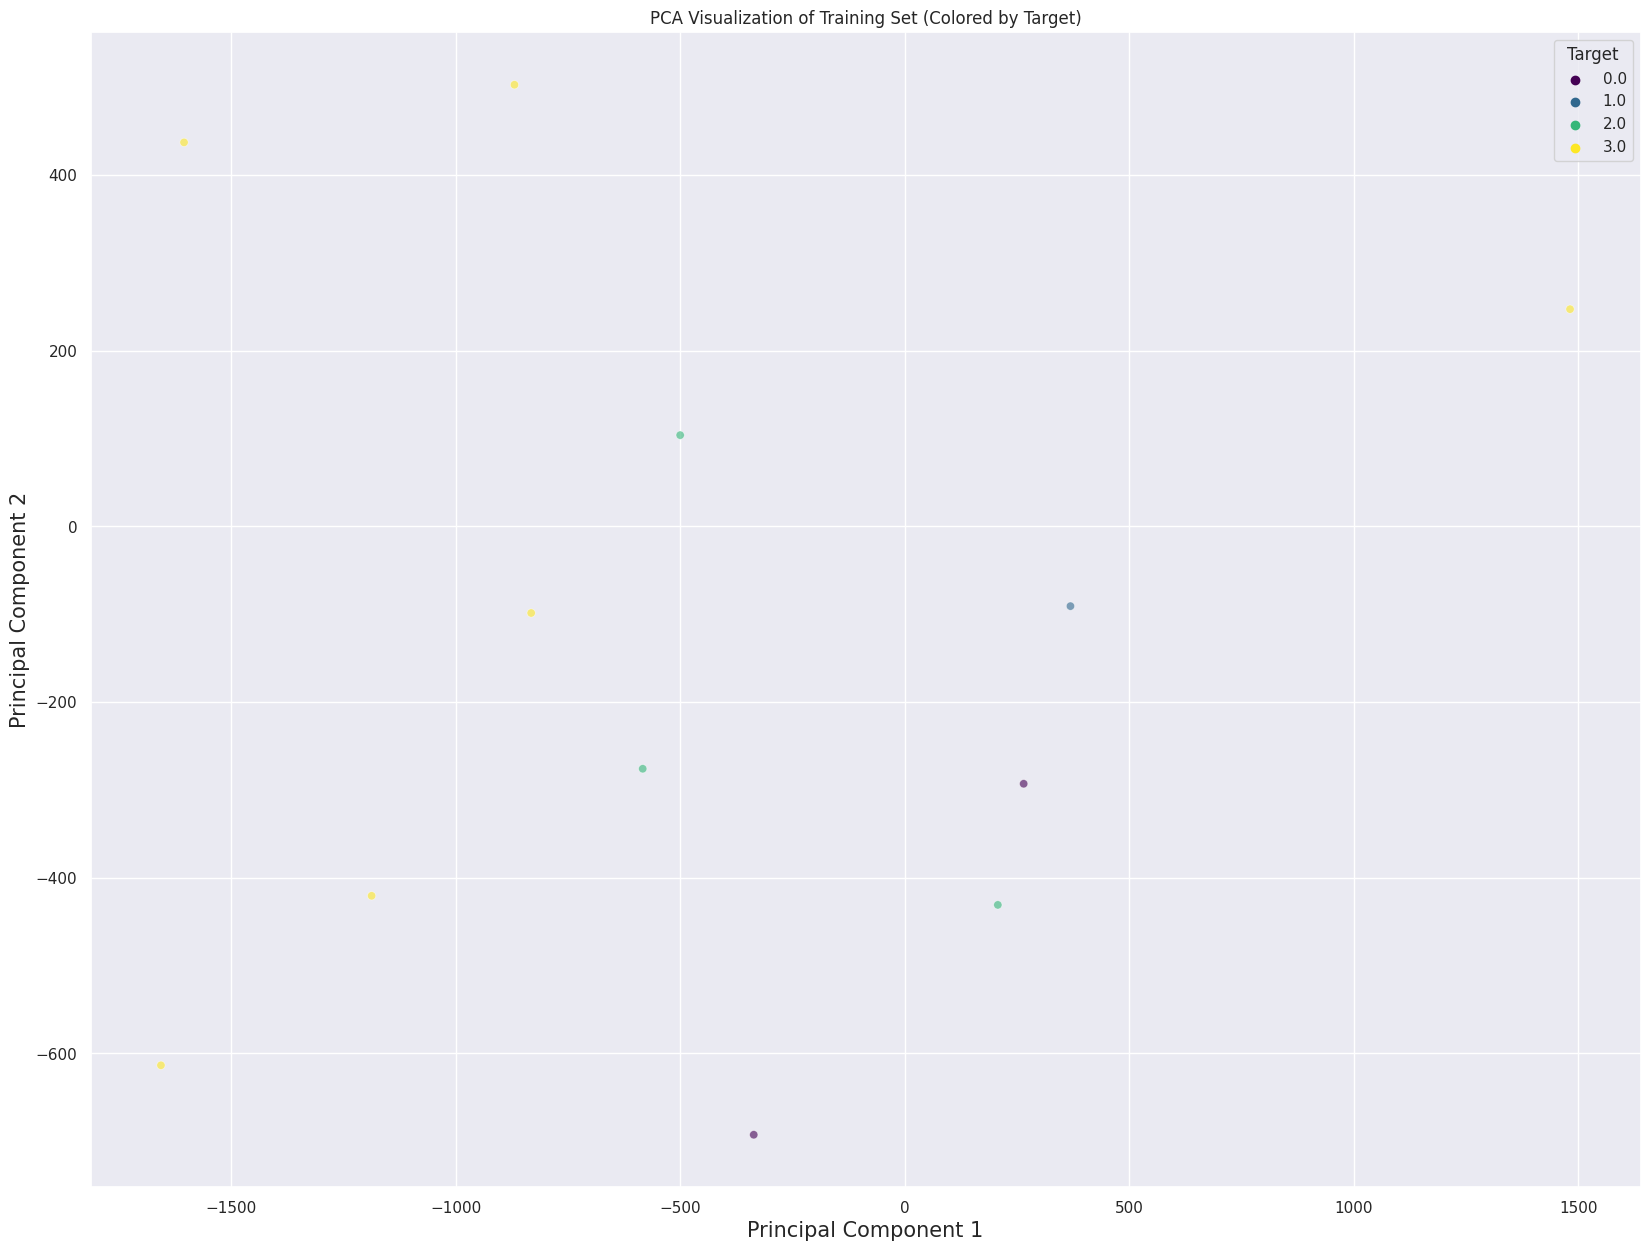

In [17]:
# Convert the PCA output to DataFrame for better readability
x_train_pca_df = pd.DataFrame(x_train, columns=['PC1', 'PC2'])
x_test_pca_df = pd.DataFrame(x_test, columns=['PC1', 'PC2'])

# --- Visualize the PCA-transformed training data ---
plot_data = pd.DataFrame({
    'PC1': x_train_pca_df['PC1'],  # First principal component
    'PC2': x_train_pca_df['PC2'],  # Second principal component
    'Target': y_train              # Target variable for coloring
})

# Create the scatter plot
plt.figure(figsize=(20, 15))  # Adjusted size for better proportions
sns.scatterplot(
    data=plot_data,
    x="PC1",
    y="PC2",
    hue="Target",  # Color by target variable (e.g., class: edible or poisonous)
    palette="viridis",  # Continuous palette (suitable for numeric targets)
    alpha=0.6  # Slight transparency for overlapping points
)

# Set labels and title
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization of Training Set (Colored by Target)")

# Show the plot
plt.show()

## Oversampling

In [18]:
smote = SMOTE(random_state=42)
print("Shape of original x_train:", x_train.shape)
print("Shape of original y_train:", y_train.shape)
x_train, y_train = smote.fit_resample(x_train, y_train)
# Print the shapes of the original and resampled data to see the effect
print("Shape of original x_train:", x_train.shape)
print("Shape of original y_train:", y_train.shape)

Shape of original x_train: (160, 2)
Shape of original y_train: (160,)
Shape of original x_train: (192, 2)
Shape of original y_train: (192,)


## Visualize data after oversampling

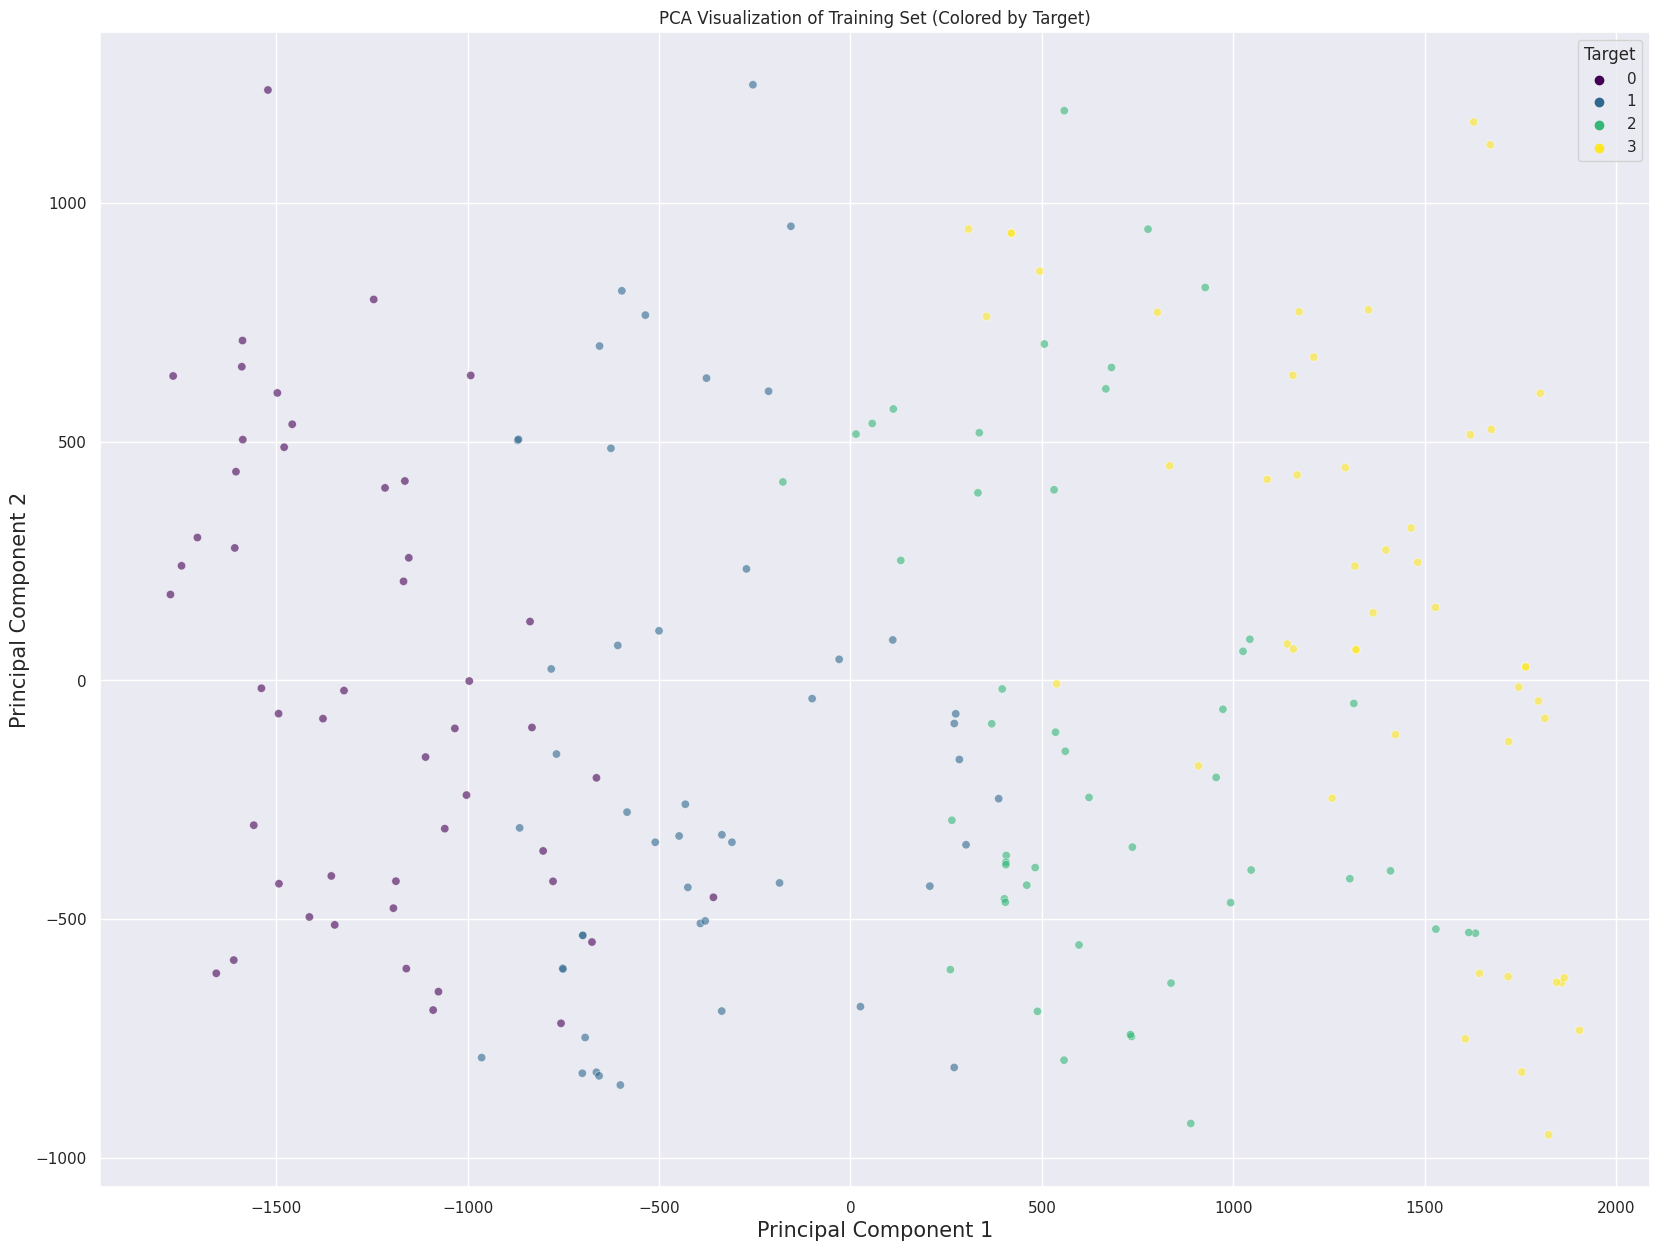

In [19]:
# Convert the PCA output to DataFrame for better readability
x_train_pca_df = pd.DataFrame(x_train, columns=['PC1', 'PC2'])
x_test_pca_df = pd.DataFrame(x_test, columns=['PC1', 'PC2'])

# --- Visualize the PCA-transformed training data ---
plot_data = pd.DataFrame({
    'PC1': x_train_pca_df['PC1'],  # First principal component
    'PC2': x_train_pca_df['PC2'],  # Second principal component
    'Target': y_train              # Target variable for coloring
})

# Create the scatter plot
plt.figure(figsize=(20, 15))  # Adjusted size for better proportions
sns.scatterplot(
    data=plot_data,
    x="PC1",
    y="PC2",
    hue="Target",  # Color by target variable (e.g., class: edible or poisonous)
    palette="viridis",  # Continuous palette (suitable for numeric targets)
    alpha=0.6  # Slight transparency for overlapping points
)

# Set labels and title
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization of Training Set (Colored by Target)")

# Show the plot
plt.show()

# Modeling, Experiments, and Model Visaulization

## Train Initial model

In [20]:
# Define the list of SVM models for multi-class classification
ml_models = [
    ("SVC", SVC(random_state=42, decision_function_shape='ovo')),
    ("NuSVC", NuSVC(random_state=42)),
    ("LinearSVC", LinearSVC(multi_class='ovr', random_state=42)),
]

# Perform cross-validation for each model
for model_name, model in ml_models:
    print(f"{model_name}: ")
    model.fit(x_train, y_train)  # Fit on training data
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)  # Stratified K-Fold
    cv_scores = cross_val_score(model, x_train, y_train, cv=skf, scoring='accuracy')  # Cross-validation
    print("\tStratified K-Fold Cross-Validation Scores:", cv_scores)
    print('-' * 100)
    print(f'\tAverage Stratified K-Fold Cross-Validation Score: {cv_scores.mean():.4f}')
    print('-' * 100)

SVC: 
	Stratified K-Fold Cross-Validation Scores: [0.85       0.75       0.78947368 0.84210526 0.78947368 0.68421053
 0.78947368 0.84210526 0.68421053 0.89473684]
----------------------------------------------------------------------------------------------------
	Average Stratified K-Fold Cross-Validation Score: 0.7916
----------------------------------------------------------------------------------------------------
NuSVC: 
	Stratified K-Fold Cross-Validation Scores: [0.85       0.75       0.84210526 0.84210526 0.73684211 0.63157895
 0.78947368 0.84210526 0.68421053 0.84210526]
----------------------------------------------------------------------------------------------------
	Average Stratified K-Fold Cross-Validation Score: 0.7811
----------------------------------------------------------------------------------------------------
LinearSVC: 
	Stratified K-Fold Cross-Validation Scores: [0.55       0.55       0.42105263 0.57894737 0.63157895 0.26315789
 0.05263158 0.36842105 0.5263

## Affect of different SVM classifiers kernal function

### SVC Kernel function

x_train shape: (192, 2)
y_train shape: (192,)
Unique classes in y_train: [0 1 2 3]


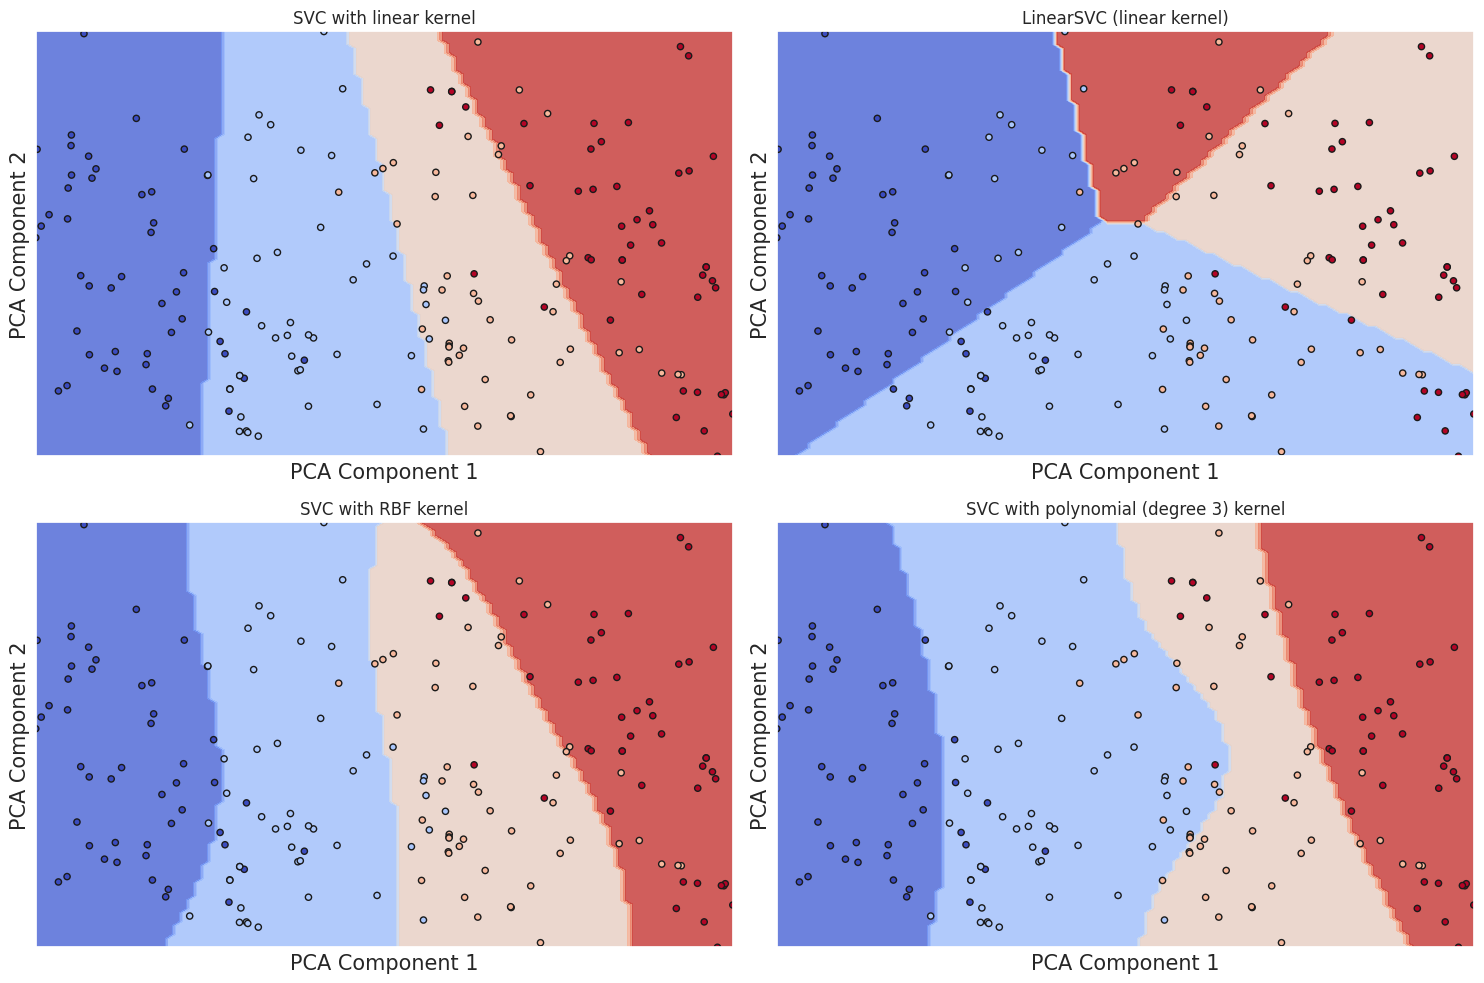

In [21]:
# Check shapes of x_train and y_train
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("Unique classes in y_train:", np.unique(y_train))

# Ensure x_train and y_train have the same number of samples
if x_train.shape[0] != y_train.shape[0]:
    raise ValueError(f"Mismatch in sample sizes: x_train has {x_train.shape[0]} samples, y_train has {y_train.shape[0]} samples")
X0, X1 = x_train[:, 0], x_train[:, 1]
# Define SVM models
#C = 1.0  # SVM regularization parameter
models = [
    svm.SVC(kernel="linear"),
    svm.LinearSVC(max_iter=1000),
    svm.SVC(kernel="rbf"),
    svm.SVC(kernel="poly"),
]

# Define SVM models
#C = 1.0  # SVM regularization parameter
#models = [
#    svm.SVC(kernel="linear",C=C),
#    svm.LinearSVC(C=C, max_iter=1000),
#    svm.SVC(kernel="rbf", gamma=0.7, C=C),
#    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
#]

# Fit the models on the scaled 2D data
try:
    fitted_models = [clf.fit(x_train, y_train) for clf in models]
except Exception as e:
    print(f"Error fitting models: {e}")
    raise

# Titles for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set-up 2x2 grid for plotting
fig, sub = plt.subplots(2, 2, figsize=(15, 10))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Plot decision boundaries
for clf, title, ax in zip(fitted_models, titles, sub.flatten()):
    try:
        disp = DecisionBoundaryDisplay.from_estimator(
            clf,
            x_train,
            response_method="predict",
            cmap=plt.cm.coolwarm,
            alpha=0.8,
            ax=ax,
            xlabel='PCA Component 1',
            ylabel='PCA Component 2',
        )
        ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(title)
    except Exception as e:
        print(f"Error plotting {title}: {e}")

plt.tight_layout()
plt.savefig('svm_decision_boundaries_fixed.png')
plt.show()

### NuSVC

x_train shape: (192, 2)
y_train shape: (192,)
Unique classes in y_train: [0 1 2 3]


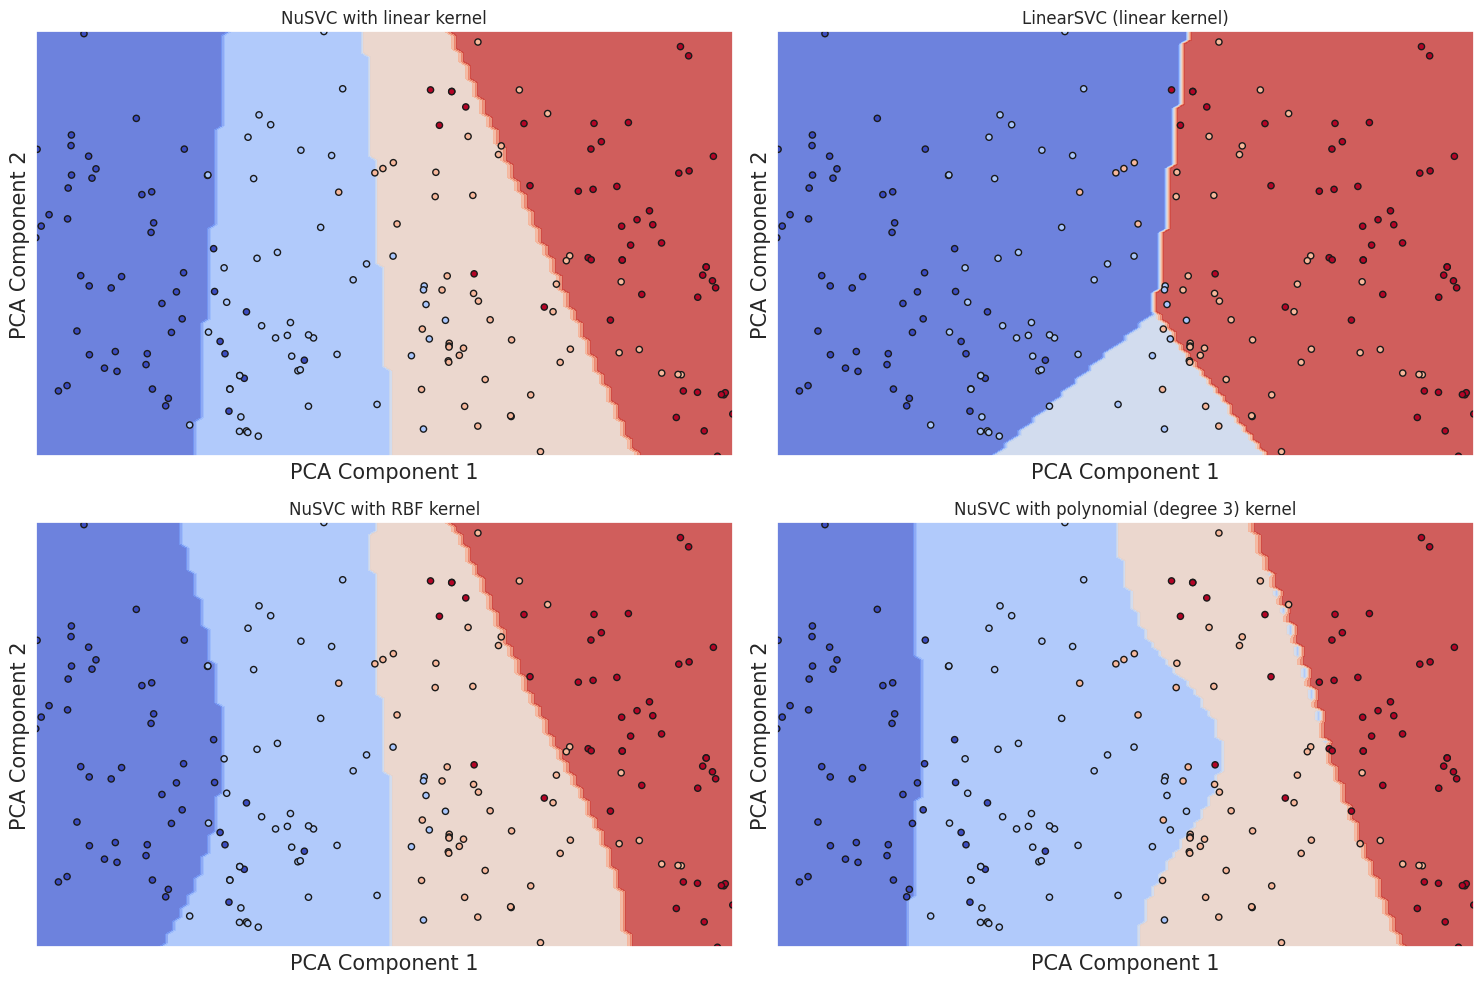

In [22]:
# Check shapes of x_train and y_train
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("Unique classes in y_train:", np.unique(y_train))

# Ensure x_train and y_train have the same number of samples
if x_train.shape[0] != y_train.shape[0]:
    raise ValueError(f"Mismatch in sample sizes: x_train has {x_train.shape[0]} samples, y_train has {y_train.shape[0]} samples")

# Define SVM models
#models = [
#    svm.NuSVC(kernel="linear"),  # Default nu=0.5
#    svm.LinearSVC(C=1.0, max_iter=10000),
#    svm.NuSVC(kernel="rbf", gamma=0.7),  # Default nu=0.5
#    svm.NuSVC(kernel="poly", degree=3, gamma="auto"),  # Default nu=0.5
#]
# Define SVM models
X0, X1 = x_train[:, 0], x_train[:, 1]
models = [
    svm.NuSVC(kernel="linear"),  # Default nu=0.5
    svm.LinearSVC(max_iter=1000),
    svm.NuSVC(kernel="rbf"),  # Default nu=0.5
    svm.NuSVC(kernel="poly"),  # Default nu=0.5
]

# Fit the models on the scaled 2D data
try:
    fitted_models = [clf.fit(x_train, y_train) for clf in models]
except Exception as e:
    print(f"Error fitting models: {e}")
    raise

# Titles for the plots
titles = (
    "NuSVC with linear kernel",
    "LinearSVC (linear kernel)",
    "NuSVC with RBF kernel",
    "NuSVC with polynomial (degree 3) kernel",
)

# Set-up 2x2 grid for plotting
fig, sub = plt.subplots(2, 2, figsize=(15, 10))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Plot decision boundaries
for clf, title, ax in zip(fitted_models, titles, sub.flatten()):
    try:
        disp = DecisionBoundaryDisplay.from_estimator(
            clf,
            x_train,
            response_method="predict",
            cmap=plt.cm.coolwarm,
            alpha=0.8,
            ax=ax,
            xlabel='PCA Component 1',
            ylabel='PCA Component 2',
        )
        ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(title)
    except Exception as e:
        print(f"Error plotting {title}: {e}")

plt.tight_layout()
plt.savefig('svm_decision_boundaries_fixed.png')
plt.show()

## SVM: Margin, support vectors, and seperating hyperplane (Decision Boundary)

### SVM Margin and support vectors

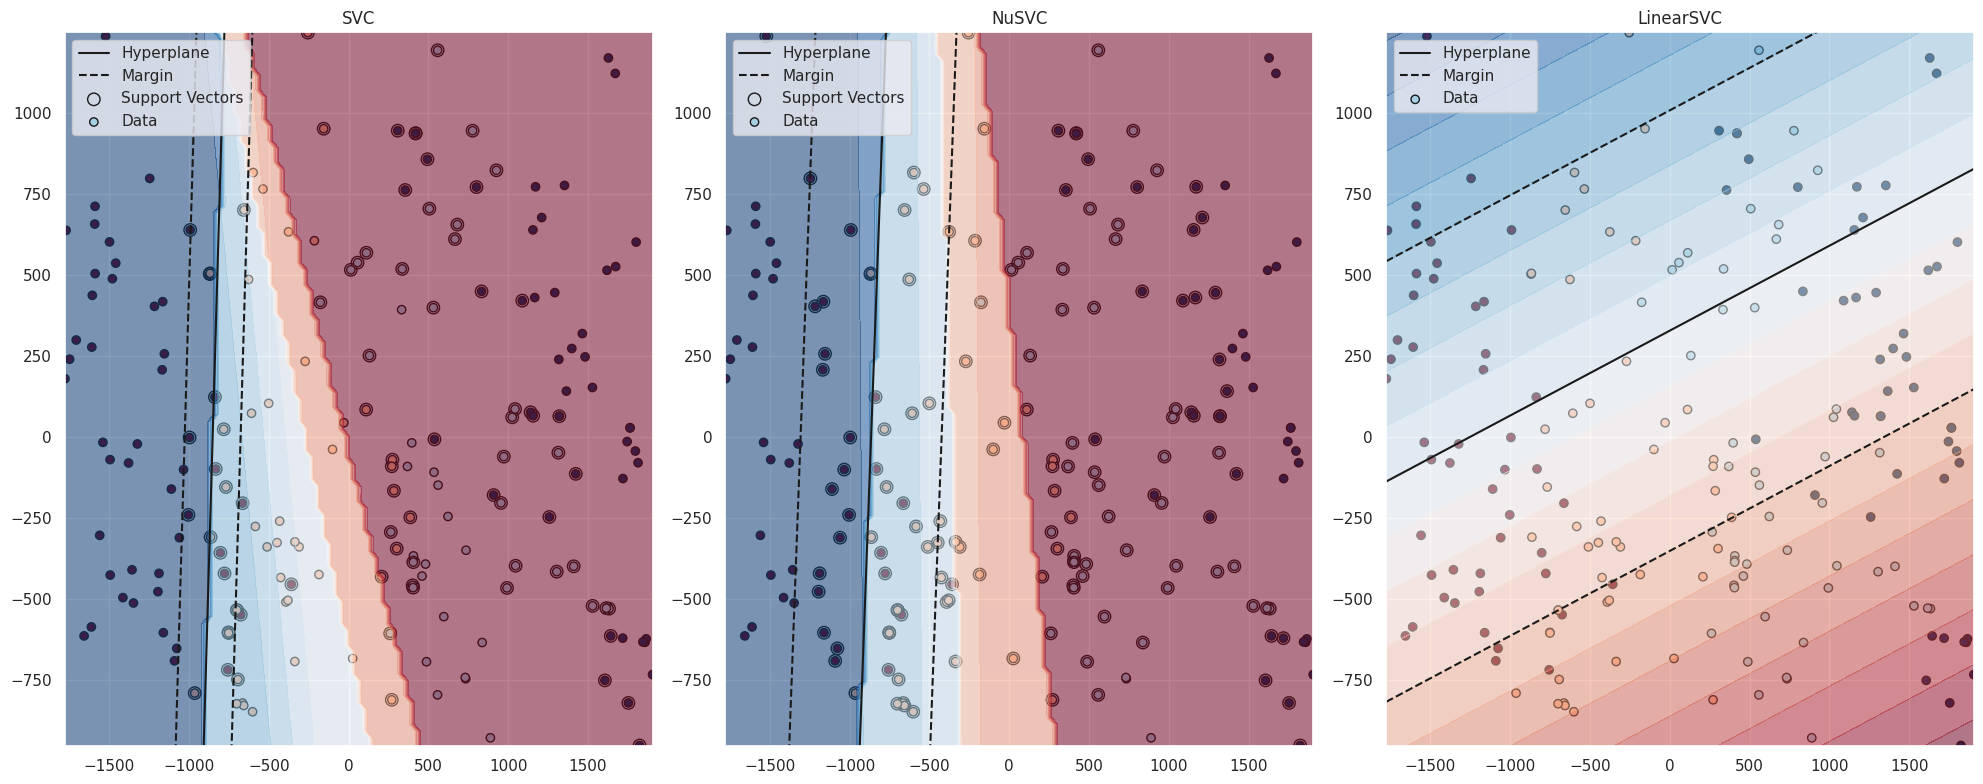

In [23]:
# Define classifiers and parameters
#classifiers = [
#    ("SVC", svm.SVC(kernel="linear", C=1)),
#    ("NuSVC", svm.NuSVC(kernel="linear", nu=0.5)),
#    ("LinearSVC", svm.LinearSVC(C=1, max_iter=10000))
#]
classifiers = [
    ("SVC", svm.SVC(kernel="linear")),
    ("NuSVC", svm.NuSVC(kernel="linear")),
    ("LinearSVC", svm.LinearSVC(max_iter=1000))
]
# Figure setup
fignum = 1
plt.figure(figsize=(20, 8))

for name, clf in classifiers:
    # Fit the model
    clf.fit(x_train, y_train)

    # For multi-class, focus on class 0 vs. rest (OvR)
    # Get the separating hyperplane for class 0
    if name == "LinearSVC":
        coef = clf.coef_[0]  # LinearSVC: coef_ shape (n_classes, n_features)
        intercept = clf.intercept_[0]
    else:
        coef = clf.coef_[0]  # SVC/NuSVC: coef_ for class 0 vs. rest
        intercept = clf.intercept_[0]

    # Compute the hyperplane
    w = coef
    a = -w[0] / w[1]
    xx = np.linspace(x_train[:, 0].min() - 1, x_train[:, 0].max() + 1)
    yy = a * xx - intercept / w[1]

    # Compute the margin
    margin = 1 / np.sqrt(np.sum(coef ** 2))
    yy_down = yy - np.sqrt(1 + a ** 2) * margin
    yy_up = yy + np.sqrt(1 + a ** 2) * margin

    # Create the plot
    plt.subplot(1, 3, fignum)
    plt.title(name)

    # Plot the hyperplane and margins
    plt.plot(xx, yy, "k-", label="Hyperplane")
    plt.plot(xx, yy_down, "k--", label="Margin")
    plt.plot(xx, yy_up, "k--")

    # Plot support vectors (for SVC and NuSVC)
    if name != "LinearSVC":
        plt.scatter(
            clf.support_vectors_[:, 0],
            clf.support_vectors_[:, 1],
            s=80,
            facecolors="none",
            edgecolors="k",
            label="Support Vectors"
        )

    # Plot the data points
    plt.scatter(
        x_train[:, 0], x_train[:, 1], c=y_train, cmap=plt.get_cmap("RdBu"),
        edgecolors="k", label="Data"
    )

    # Create mesh for decision function (for class 0)
    x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
    y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
    XX, YY = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    xy = np.vstack([XX.ravel(), YY.ravel()]).T

    # Get decision function for class 0
    if name == "LinearSVC":
        Z = clf.decision_function(xy)[:, 0].reshape(XX.shape)  # Class 0 decision
    else:
        Z = clf.decision_function(xy)[:, 0].reshape(XX.shape)

    # Plot decision function contours
    plt.contourf(XX, YY, Z, cmap=plt.get_cmap("RdBu"), alpha=0.5, levels=20)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.legend()
    fignum += 1

plt.tight_layout()
plt.show()

### SVM: Maximum margin separating hyperplane (LinearSVC)

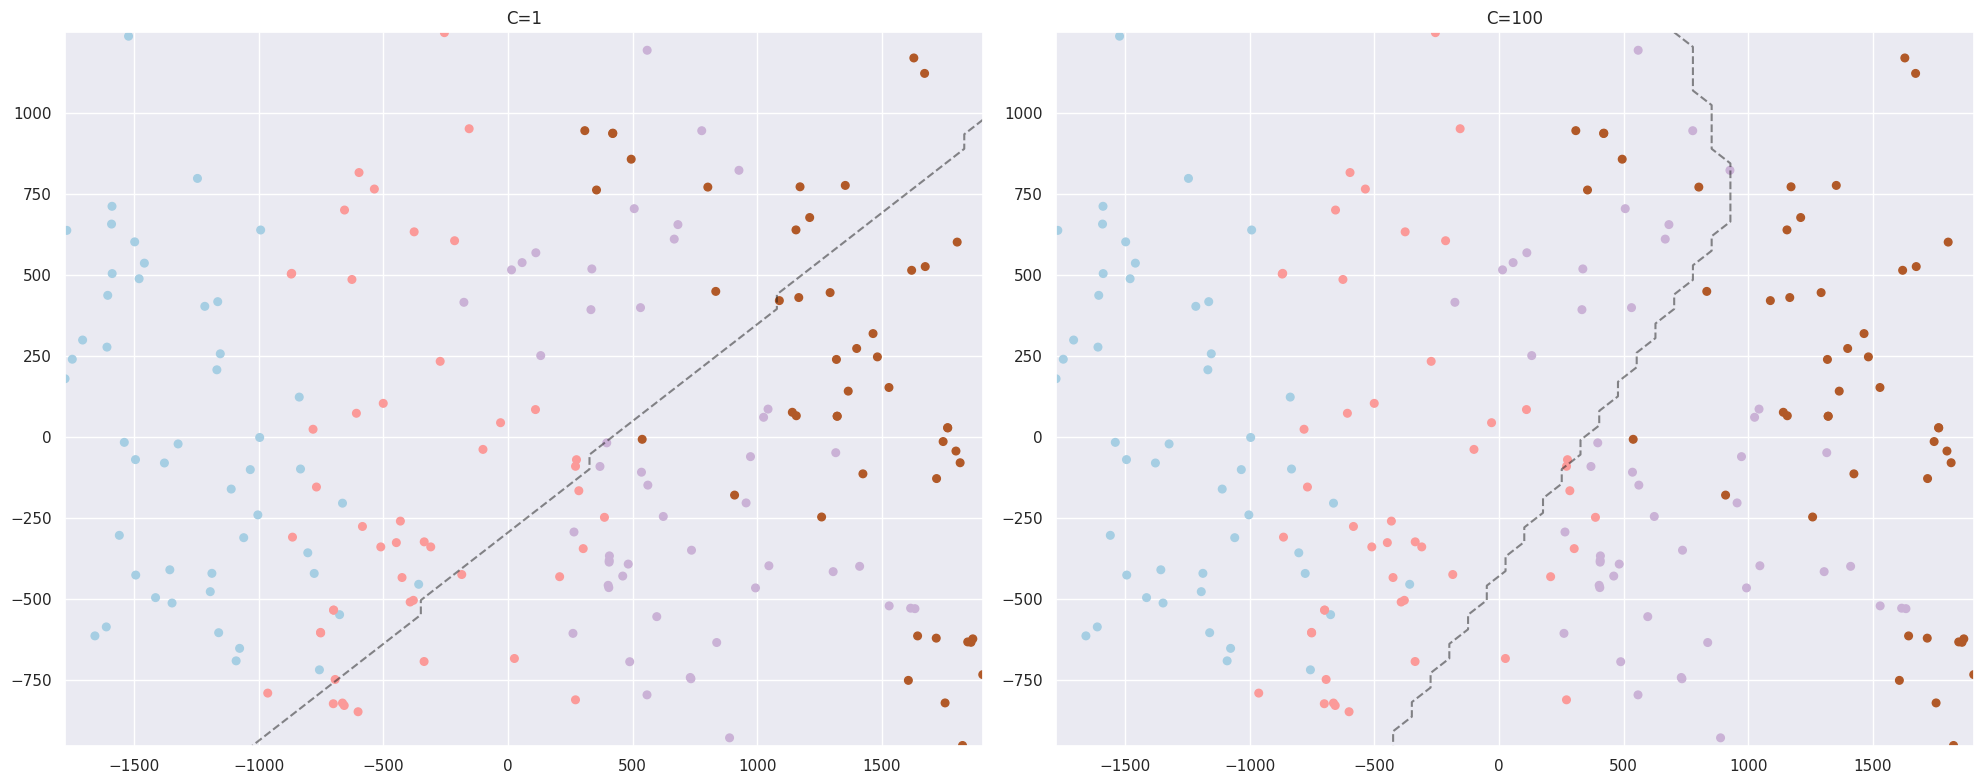

In [24]:
# Set up the figure
plt.figure(figsize=(20, 8))

# Loop over different C values
for i, C in enumerate([1, 100]):
    # Fit LinearSVC with the specified C value
    clf = svm.LinearSVC(C=C, loss="hinge", random_state=42, max_iter=10000).fit(x_train, y_train)
    
    # Compute the decision function for all classes (OvR)
    decision_function = clf.decision_function(x_train)
    
    # Identify support vectors for each OvR classifier
    # A point is a support vector if it lies within the margin (|decision_function| <= 1) for any class
    support_vector_indices = np.where(np.any(np.abs(decision_function) <= 1 + 1e-15, axis=1))[0]
    support_vectors = x_train[support_vector_indices]

    # Create subplot
    plt.subplot(1, 2, i + 1)
    
    # Plot the data points, colored by class
    plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)
    
    # Plot decision boundaries and margins using DecisionBoundaryDisplay
    ax = plt.gca()
    DecisionBoundaryDisplay.from_estimator(
        clf,
        x_train,
        ax=ax,
        grid_resolution=50,
        plot_method="contour",
        colors="k",
        levels=[-1, 0, 1],
        alpha=0.5,
        linestyles=["--", "-", "--"],
    )
    
    # Plot the support vectors
    plt.scatter(
        support_vectors[:, 0],
        support_vectors[:, 1],
        s=100,
        #linewidth=5,
        facecolors="none",
        #edgecolors="k",
    )
    
    # Set title
    plt.title("C=" + str(C))

# Finalize the plot
plt.tight_layout()
plt.show()

### SVM: Maximum margin separating hyperplane (SVC)

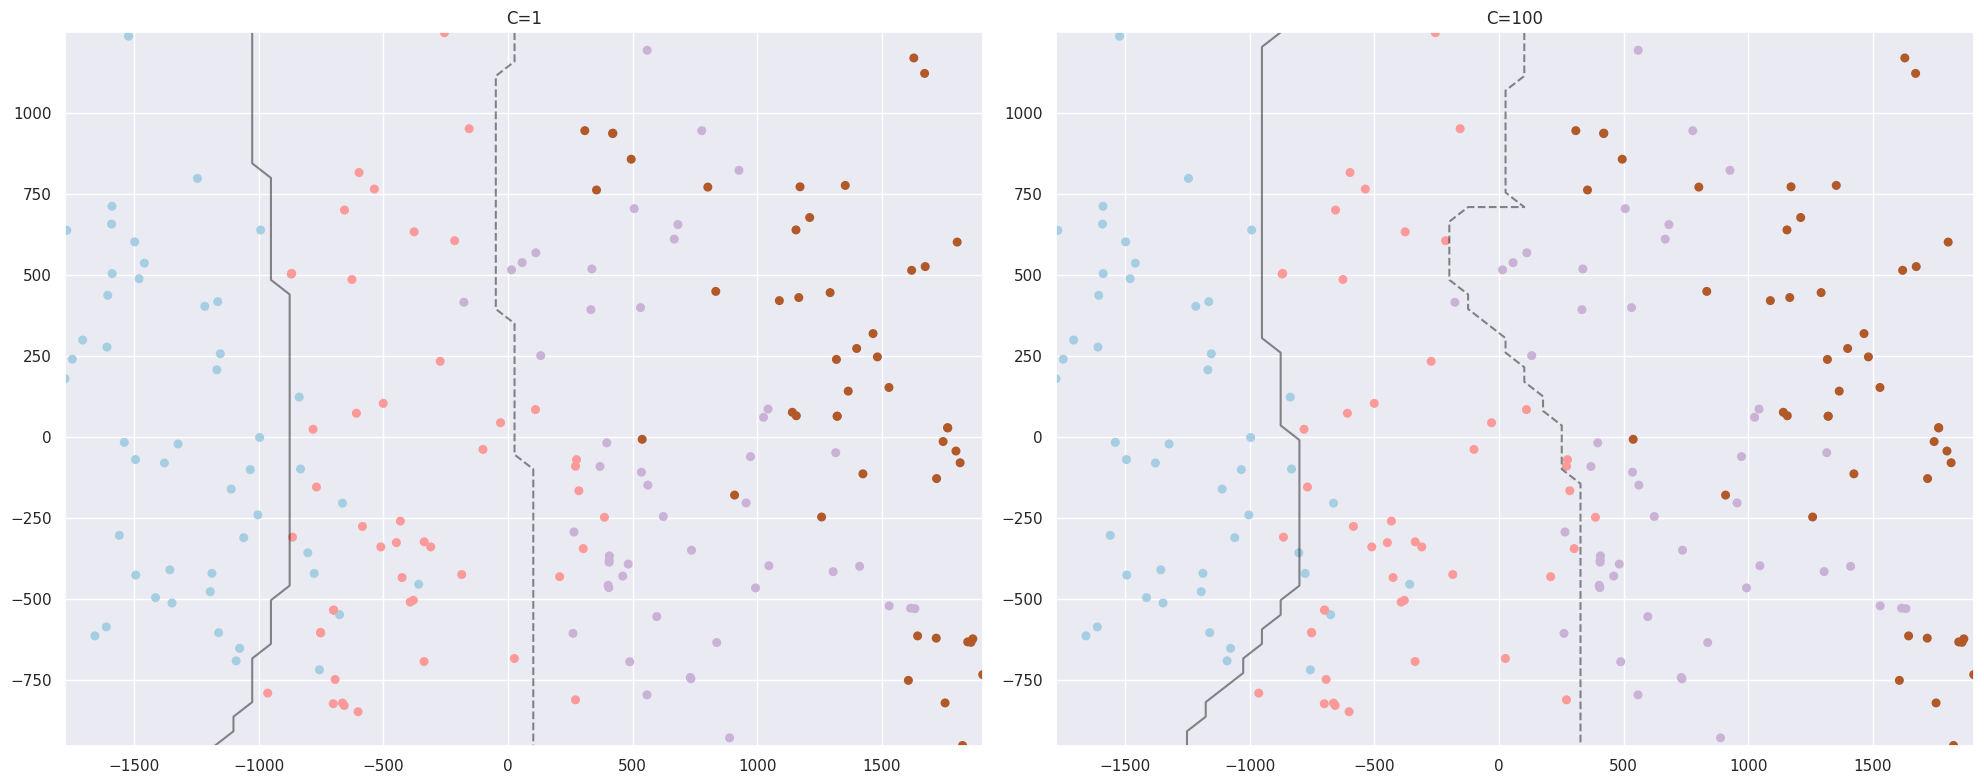

In [25]:
# Set up the figure
plt.figure(figsize=(20, 8))

# Loop over different C values
for i, C in enumerate([1, 100]):
    # Fit LinearSVC with the specified C value
    clf = svm.SVC(C=C, random_state=42).fit(x_train, y_train)
    
    # Compute the decision function for all classes (OvR)
    decision_function = clf.decision_function(x_train)
    
    # Identify support vectors for each OvR classifier
    # A point is a support vector if it lies within the margin (|decision_function| <= 1) for any class
    support_vector_indices = np.where(np.any(np.abs(decision_function) <= 1 + 1e-15, axis=1))[0]
    support_vectors = x_train[support_vector_indices]

    # Create subplot
    plt.subplot(1, 2, i + 1)
    
    # Plot the data points, colored by class
    plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)
    
    # Plot decision boundaries and margins using DecisionBoundaryDisplay
    ax = plt.gca()
    DecisionBoundaryDisplay.from_estimator(
        clf,
        x_train,
        ax=ax,
        grid_resolution=50,
        plot_method="contour",
        colors="k",
        levels=[-1, 0, 1],
        alpha=0.5,
        linestyles=["--", "-", "--"],
    )
    
    # Plot the support vectors
    plt.scatter(
        support_vectors[:, 0],
        support_vectors[:, 1],
        s=100,
        #linewidth=5,
        facecolors="none",
        #edgecolors="k",
    )
    
    # Set title
    plt.title("C=" + str(C))

# Finalize the plot
plt.tight_layout()
plt.show()

### SVM: Maximum margin separating hyperplane (NuSVC)

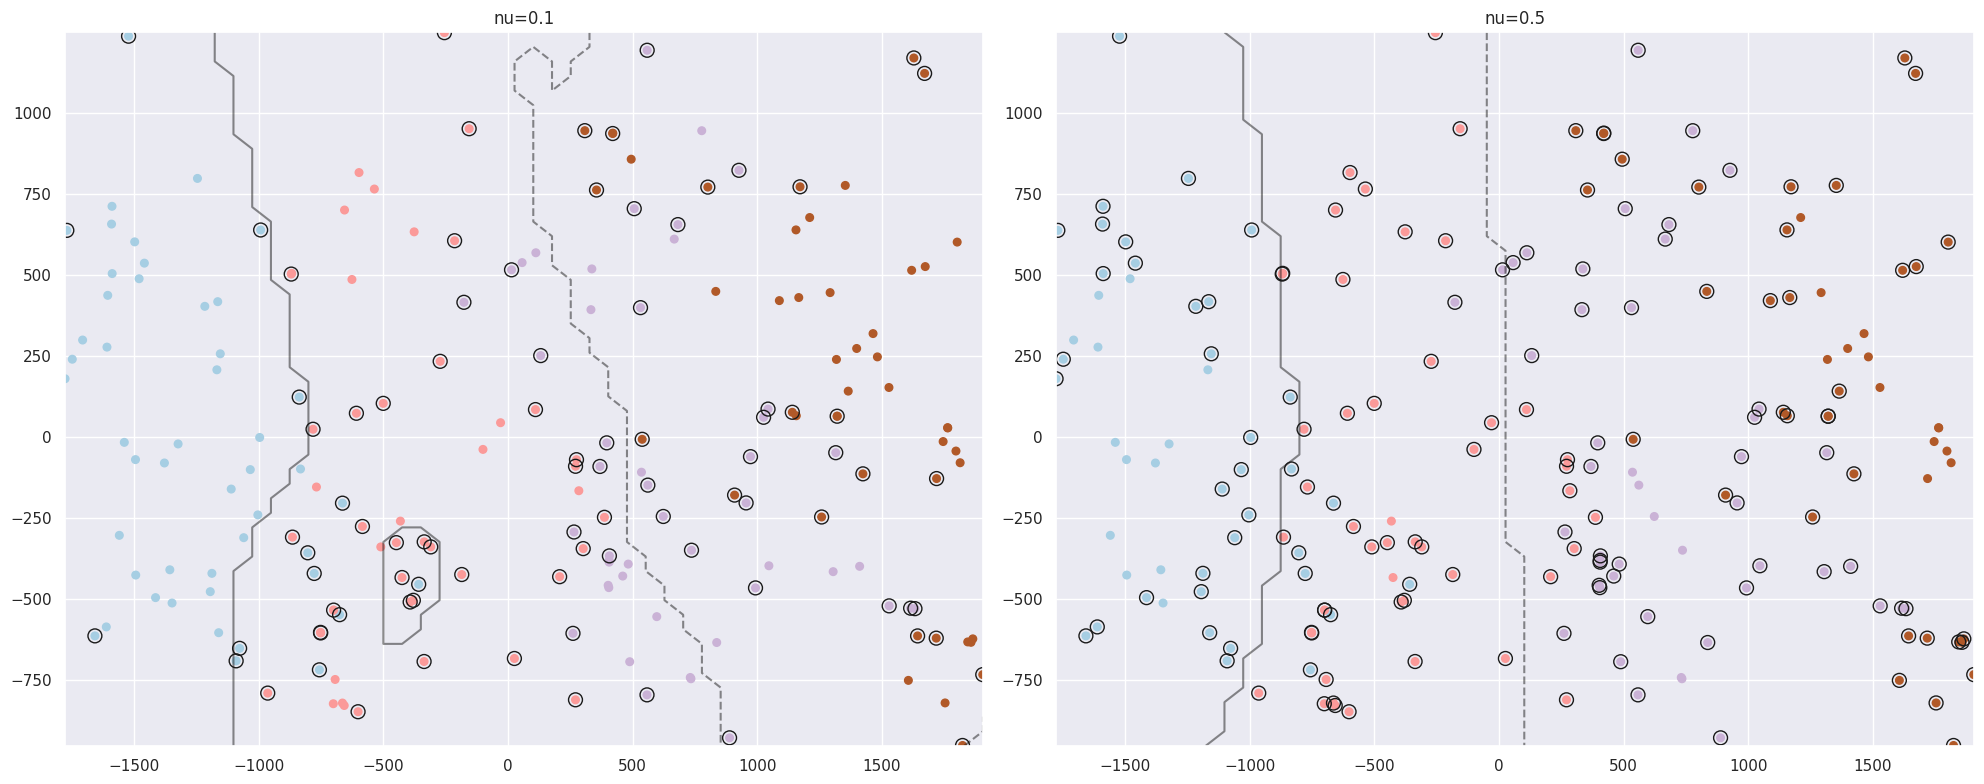

In [26]:
# For demonstration purposes, let's create dummy data if not already present.
try:
    x_train.shape, y_train.shape
except NameError:
    from sklearn.datasets import make_classification
    # Creating a dummy dataset with 2 features for easy 2D plotting
    x_train, y_train = make_classification(n_samples=100, n_features=2, n_informative=2,
                                           n_redundant=0, n_clusters_per_class=1, random_state=42)
    # Ensure y_train has at least two unique classes for classification
    if np.unique(y_train).size < 2:
        y_train[0] = 0
        y_train[1] = 1


# Set up the figure
plt.figure(figsize=(20, 8))

# Loop over different nu values (instead of C) for NuSVC
# Common nu values are between 0 and 1. Here, 0.1 and 0.5 are used as examples.
for i, nu_val in enumerate([0.1, 0.5]): # Changed C to nu_val
    # Fit NuSVC with the specified nu value
    clf = svm.NuSVC(nu=nu_val, random_state=42).fit(x_train, y_train) # Changed C=C to nu=nu_val

    # Compute the decision function for all classes (OvR)
    decision_function = clf.decision_function(x_train)

    # Identify support vectors for each OvR classifier
    # A point is a support vector if it lies within the margin (|decision_function| <= 1) for any class
    # NuSVC directly provides support_vectors_
    support_vectors = clf.support_vectors_


    # Create subplot
    plt.subplot(1, 2, i + 1)

    # Plot the data points, colored by class
    plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)

    # Plot decision boundaries and margins using DecisionBoundaryDisplay
    ax = plt.gca()
    DecisionBoundaryDisplay.from_estimator(
        clf,
        x_train,
        ax=ax,
        grid_resolution=50,
        plot_method="contour",
        colors="k",
        levels=[-1, 0, 1],
        alpha=0.5,
        linestyles=["--", "-", "--"],
    )

    # Plot the support vectors
    plt.scatter(
        support_vectors[:, 0],
        support_vectors[:, 1],
        s=100,
        facecolors="none",
        edgecolors="k", # Often support vectors are highlighted with black edges
        marker='o' # Explicitly use circle marker
    )

    # Set title
    plt.title("nu=" + str(nu_val)) # Changed title to reflect nu

# Finalize the plot
plt.tight_layout()
plt.show()

## Hyperparameters Tuning

In [27]:
# Define StratifiedKFold with fewer folds for speed
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the list of SVM models
ml_models = [
    ("SVC", SVC(random_state=42, decision_function_shape='ovo')),
    ("NuSVC", NuSVC(random_state=42)),
    ("LinearSVC", LinearSVC(multi_class='ovr', random_state=42)),
]

# Function to create an objective for Optuna
def create_objective(model_name, X, y, cv):
    def objective(trial):
        if model_name == "SVC":
            C = trial.suggest_float("C", 1e-2, 1e2, log=True)  # Narrower range
            kernel = trial.suggest_categorical("kernel", ["linear", "rbf"])  # Fewer kernels
            if kernel == "rbf":
                gamma = trial.suggest_float("gamma", 1e-2, 1e2, log=True)  # Narrower range
            else:
                gamma = "scale"
            degree = 2  # Fixed degree for simplicity
            model = SVC(
                C=C,
                kernel=kernel,
                gamma=gamma,
                degree=degree,
                random_state=42,
                decision_function_shape='ovo'
            )
        elif model_name == "NuSVC":
            nu = trial.suggest_float("nu", 0.2, 0.8)  # Narrower range
            kernel = trial.suggest_categorical("kernel", ["linear", "rbf"])  # Fewer kernels
            if kernel == "rbf":
                gamma = trial.suggest_float("gamma", 1e-2, 1e2, log=True)  # Narrower range
            else:
                gamma = "scale"
            degree = 2  # Fixed degree for simplicity
            model = NuSVC(
                nu=nu,
                kernel=kernel,
                gamma=gamma,
                degree=degree,
                random_state=42
            )
        else:  # LinearSVC
            C = trial.suggest_float("C", 1e-2, 1e2, log=True)  # Narrower range
            loss = trial.suggest_categorical("loss", ["squared_hinge"])  # Single option
            dual = False  # Fixed for speed
            model = LinearSVC(
                C=C,
                loss=loss,
                dual=dual,
                multi_class='ovr',
                random_state=42,
                max_iter=5000  # Reduced iterations
            )

        # Compute cross-validation score
        scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy', n_jobs=-1)  # Parallelize CV
        return scores.mean()

    return objective

# Perform hyperparameter tuning for each model
for model_name, _ in ml_models:
    print(f"\nTuning {model_name} with Optuna...")
    
    # Create Optuna study with parallel execution
    study = optuna.create_study(direction="maximize")
    objective = create_objective(model_name, x_train, y_train, skf)
    study.optimize(objective, n_trials=10, n_jobs=-1)  # Reduced trials, parallelized

    # Get the best parameters
    best_params = study.best_params
    print(f"Best parameters for {model_name}: {best_params}")
    print(f"Best cross-validation score: {study.best_value:.4f}")

    # Retrain the model with the best parameters
    if model_name == "SVC":
        best_model = SVC(**{k: v for k, v in best_params.items() if k in ["C", "kernel", "gamma", "degree"]},
                        random_state=42, decision_function_shape='ovo')
    elif model_name == "NuSVC":
        best_model = NuSVC(**{k: v for k, v in best_params.items() if k in ["nu", "kernel", "gamma", "degree"]},
                          random_state=42)
    else:  # LinearSVC
        best_model = LinearSVC(**{k: v for k, v in best_params.items() if k in ["C", "loss", "dual"]},
                              multi_class='ovr', random_state=42, max_iter=5000)

    # Perform cross-validation with the best model
    best_model.fit(x_train, y_train)
    cv_scores = cross_val_score(best_model, x_train, y_train, cv=skf, scoring='accuracy', n_jobs=-1)
    
    print(f"\n{model_name} (after tuning): ")
    print("\tStratified K-Fold Cross-Validation Scores:", cv_scores)
    print('-' * 100)
    print(f'\tAverage Stratified K-Fold Cross-Validation Score: {cv_scores.mean():.4f}')
    print('-' * 100)

[I 2025-07-22 15:20:25,226] A new study created in memory with name: no-name-03774776-0fa6-42be-b39b-314bf88bb469



Tuning SVC with Optuna...


[I 2025-07-22 15:20:27,478] Trial 1 finished with value: 0.2554655870445344 and parameters: {'C': 0.02728755666264584, 'kernel': 'rbf', 'gamma': 0.03249929286404246}. Best is trial 1 with value: 0.2554655870445344.
[I 2025-07-22 15:20:27,479] Trial 3 finished with value: 0.23967611336032388 and parameters: {'C': 0.014021239241941999, 'kernel': 'rbf', 'gamma': 2.4148523936581174}. Best is trial 1 with value: 0.2554655870445344.
[I 2025-07-22 15:20:27,493] Trial 2 finished with value: 0.23967611336032388 and parameters: {'C': 1.7914212092720674, 'kernel': 'rbf', 'gamma': 41.836875985536174}. Best is trial 1 with value: 0.2554655870445344.
[I 2025-07-22 15:20:27,536] Trial 0 finished with value: 0.23441295546558702 and parameters: {'C': 0.019638495545644667, 'kernel': 'rbf', 'gamma': 48.45806368933708}. Best is trial 1 with value: 0.2554655870445344.
[I 2025-07-22 15:20:27,589] Trial 4 finished with value: 0.2449392712550607 and parameters: {'C': 0.591915405972672, 'kernel': 'rbf', 'gamma

Best parameters for SVC: {'C': 0.04982299084465115, 'kernel': 'linear'}
Best cross-validation score: 0.7757


[I 2025-07-22 15:20:34,467] A new study created in memory with name: no-name-eac19302-f14c-409d-86f2-5f75c2fb5507
[I 2025-07-22 15:20:34,520] Trial 0 finished with value: 0.29689608636977055 and parameters: {'nu': 0.4453184134078083, 'kernel': 'rbf', 'gamma': 0.09139690506600583}. Best is trial 0 with value: 0.29689608636977055.



SVC (after tuning): 
	Stratified K-Fold Cross-Validation Scores: [0.79487179 0.82051282 0.73684211 0.76315789 0.76315789]
----------------------------------------------------------------------------------------------------
	Average Stratified K-Fold Cross-Validation Score: 0.7757
----------------------------------------------------------------------------------------------------

Tuning NuSVC with Optuna...


[I 2025-07-22 15:21:04,246] Trial 2 finished with value: 0.7809716599190284 and parameters: {'nu': 0.6301756510657923, 'kernel': 'linear'}. Best is trial 2 with value: 0.7809716599190284.
[I 2025-07-22 15:21:19,051] Trial 4 finished with value: 0.3592442645074224 and parameters: {'nu': 0.5037391450766238, 'kernel': 'rbf', 'gamma': 0.018263215815521185}. Best is trial 2 with value: 0.7809716599190284.
[I 2025-07-22 15:21:36,142] Trial 1 finished with value: 0.57165991902834 and parameters: {'nu': 0.2360680630362087, 'kernel': 'linear'}. Best is trial 2 with value: 0.7809716599190284.
[I 2025-07-22 15:21:56,692] Trial 6 finished with value: 0.7808367071524966 and parameters: {'nu': 0.7475028151419247, 'kernel': 'linear'}. Best is trial 2 with value: 0.7809716599190284.
[I 2025-07-22 15:21:56,736] Trial 7 finished with value: 0.7809716599190284 and parameters: {'nu': 0.6585901003797952, 'kernel': 'linear'}. Best is trial 2 with value: 0.7809716599190284.
[I 2025-07-22 15:21:56,786] Trial 

Best parameters for NuSVC: {'nu': 0.6301756510657923, 'kernel': 'linear'}
Best cross-validation score: 0.7810

NuSVC (after tuning): 
	Stratified K-Fold Cross-Validation Scores: [0.79487179 0.82051282 0.71052632 0.81578947 0.76315789]
----------------------------------------------------------------------------------------------------
	Average Stratified K-Fold Cross-Validation Score: 0.7810
----------------------------------------------------------------------------------------------------

Tuning LinearSVC with Optuna...


[I 2025-07-22 15:22:06,477] Trial 9 finished with value: 0.6298245614035087 and parameters: {'C': 0.022053172069539294, 'loss': 'squared_hinge'}. Best is trial 3 with value: 0.7601889338731443.


Best parameters for LinearSVC: {'C': 0.8655819813591623, 'loss': 'squared_hinge'}
Best cross-validation score: 0.7602

LinearSVC (after tuning): 
	Stratified K-Fold Cross-Validation Scores: [0.43589744 0.56410256 0.28947368 0.31578947 0.42105263]
----------------------------------------------------------------------------------------------------
	Average Stratified K-Fold Cross-Validation Score: 0.4053
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [28]:
# Define StratifiedKFold with fewer folds for speed
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the list of SVM models
ml_models = [
    ("SVC", SVC(random_state=42, decision_function_shape='ovo')),
    ("NuSVC", NuSVC(random_state=42)),
    ("LinearSVC", LinearSVC(multi_class='ovr', random_state=42)),
]

# Function to create an objective for Optuna
def create_objective(model_name, X, y, cv):
    def objective(trial):
        if model_name == "SVC":
            C = trial.suggest_float("C", 1e-2, 1e2, log=True)
            kernel = trial.suggest_categorical("kernel", ["linear", "rbf"])
            if kernel == "rbf":
                gamma = trial.suggest_float("gamma", 1e-2, 1e2, log=True)
            else:
                gamma = "scale"
            degree = 2
            model = SVC(
                C=C,
                kernel=kernel,
                gamma=gamma,
                degree=degree,
                random_state=42,
                decision_function_shape='ovo'
            )
        elif model_name == "NuSVC":
            nu = trial.suggest_float("nu", 0.2, 0.8)
            kernel = trial.suggest_categorical("kernel", ["linear", "rbf"])
            if kernel == "rbf":
                gamma = trial.suggest_float("gamma", 1e-2, 1e2, log=True)
            else:
                gamma = "scale"
            degree = 2
            model = NuSVC(
                nu=nu,
                kernel=kernel,
                gamma=gamma,
                degree=degree,
                random_state=42
            )
        else:  # LinearSVC
            C = trial.suggest_float("C", 1e-2, 1e2, log=True)
            loss = trial.suggest_categorical("loss", ["squared_hinge"])
            dual = False
            # Increased max_iter significantly to address ConvergenceWarning
            model = LinearSVC(
                C=C,
                loss=loss,
                dual=dual,
                multi_class='ovr',
                random_state=42,
                max_iter=1000  # Increased from 10000 to 20000
            )

        # Compute cross-validation score
        scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy', n_jobs=-1)
        return scores.mean()

    return objective

# Perform hyperparameter tuning for each model
for model_name, _ in ml_models:
    print(f"\nTuning {model_name} with Optuna...")

    # Create Optuna study with parallel execution
    study = optuna.create_study(direction="maximize")
    objective = create_objective(model_name, x_train, y_train, skf)
    study.optimize(objective, n_trials=10, n_jobs=-1)

    # Get the best parameters
    best_params = study.best_params
    print(f"Best parameters for {model_name}: {best_params}")
    print(f"Best cross-validation score: {study.best_value:.4f}")

    # Retrain the model with the best parameters
    if model_name == "SVC":
        best_model = SVC(**{k: v for k, v in best_params.items() if k in ["C", "kernel", "gamma", "degree"]},
                         random_state=42, decision_function_shape='ovo')
    elif model_name == "NuSVC":
        best_model = NuSVC(**{k: v for k, v in best_params.items() if k in ["nu", "kernel", "gamma", "degree"]},
                           random_state=42)
    else:  # LinearSVC
        best_model = LinearSVC(**{k: v for k, v in best_params.items() if k in ["C", "loss", "dual"]},
                               multi_class='ovr', random_state=42,
                               max_iter=20000)  # Increased iterations here as well

    # Perform cross-validation with the best model
    best_model.fit(x_train, y_train)  # Fit the model for final evaluation
    cv_scores = cross_val_score(best_model, x_train, y_train, cv=skf, scoring='accuracy', n_jobs=-1)

    print(f"\n{model_name} (after tuning): ")
    print("\tStratified K-Fold Cross-Validation Scores:", cv_scores)
    print('-' * 100)
    print(f'\tAverage Stratified K-Fold Cross-Validation Score: {cv_scores.mean():.4f}')
    print('-' * 100)

[I 2025-07-22 15:22:07,004] A new study created in memory with name: no-name-1f4ec5db-8544-4740-b413-6a60a13b297a



Tuning SVC with Optuna...


[I 2025-07-22 15:22:52,660] Trial 0 finished with value: 0.7859649122807018 and parameters: {'C': 2.8928184499328093, 'kernel': 'linear'}. Best is trial 0 with value: 0.7859649122807018.
[I 2025-07-22 15:22:54,827] Trial 2 finished with value: 0.29689608636977055 and parameters: {'C': 5.412667302570545, 'kernel': 'rbf', 'gamma': 0.04649963044957536}. Best is trial 0 with value: 0.7859649122807018.
[I 2025-07-22 15:22:54,880] Trial 1 finished with value: 0.23967611336032388 and parameters: {'C': 1.470592142345272, 'kernel': 'rbf', 'gamma': 15.305956721111972}. Best is trial 0 with value: 0.7859649122807018.
[I 2025-07-22 15:22:54,923] Trial 4 finished with value: 0.2554655870445344 and parameters: {'C': 0.1335587417449343, 'kernel': 'rbf', 'gamma': 0.016524344675440686}. Best is trial 0 with value: 0.7859649122807018.
[I 2025-07-22 15:22:54,976] Trial 5 finished with value: 0.23967611336032388 and parameters: {'C': 0.1783106725275213, 'kernel': 'rbf', 'gamma': 31.097859917047142}. Best 

Best parameters for SVC: {'C': 3.6302459519245236, 'kernel': 'linear'}
Best cross-validation score: 0.7912


[I 2025-07-22 15:25:30,604] A new study created in memory with name: no-name-cd05495a-d476-4a3d-8ffa-1577baeb62bd
[I 2025-07-22 15:25:30,664] Trial 2 finished with value: 0.28137651821862353 and parameters: {'nu': 0.38795457647018267, 'kernel': 'rbf', 'gamma': 0.280454190310205}. Best is trial 2 with value: 0.28137651821862353.



SVC (after tuning): 
	Stratified K-Fold Cross-Validation Scores: [0.84615385 0.82051282 0.73684211 0.76315789 0.78947368]
----------------------------------------------------------------------------------------------------
	Average Stratified K-Fold Cross-Validation Score: 0.7912
----------------------------------------------------------------------------------------------------

Tuning NuSVC with Optuna...


[I 2025-07-22 15:26:21,864] Trial 0 finished with value: 0.27611336032388667 and parameters: {'nu': 0.5760613051864603, 'kernel': 'rbf', 'gamma': 0.4450851988383699}. Best is trial 2 with value: 0.28137651821862353.
[I 2025-07-22 15:26:21,920] Trial 1 finished with value: 0.7860998650472335 and parameters: {'nu': 0.7342095604938754, 'kernel': 'linear'}. Best is trial 1 with value: 0.7860998650472335.
[I 2025-07-22 15:26:21,980] Trial 4 finished with value: 0.7913630229419704 and parameters: {'nu': 0.6946462502805428, 'kernel': 'linear'}. Best is trial 4 with value: 0.7913630229419704.
[I 2025-07-22 15:26:33,063] Trial 6 finished with value: 0.7964912280701755 and parameters: {'nu': 0.4737271609859314, 'kernel': 'linear'}. Best is trial 6 with value: 0.7964912280701755.
[I 2025-07-22 15:26:33,122] Trial 7 finished with value: 0.23441295546558702 and parameters: {'nu': 0.5450680190833317, 'kernel': 'rbf', 'gamma': 61.346077433421705}. Best is trial 6 with value: 0.7964912280701755.
[I 20

Best parameters for NuSVC: {'nu': 0.4737271609859314, 'kernel': 'linear'}
Best cross-validation score: 0.7965

NuSVC (after tuning): 
	Stratified K-Fold Cross-Validation Scores: [0.84615385 0.82051282 0.71052632 0.84210526 0.76315789]
----------------------------------------------------------------------------------------------------
	Average Stratified K-Fold Cross-Validation Score: 0.7965
----------------------------------------------------------------------------------------------------

Tuning LinearSVC with Optuna...
Best parameters for LinearSVC: {'C': 0.8547196449383917, 'loss': 'squared_hinge'}
Best cross-validation score: 0.7602


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



LinearSVC (after tuning): 
	Stratified K-Fold Cross-Validation Scores: [0.53846154 0.58974359 0.26315789 0.47368421 0.55263158]
----------------------------------------------------------------------------------------------------
	Average Stratified K-Fold Cross-Validation Score: 0.4835
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## Decision Boundary of the best model on train dataset

Text(0, 0.5, 'Feature 2')

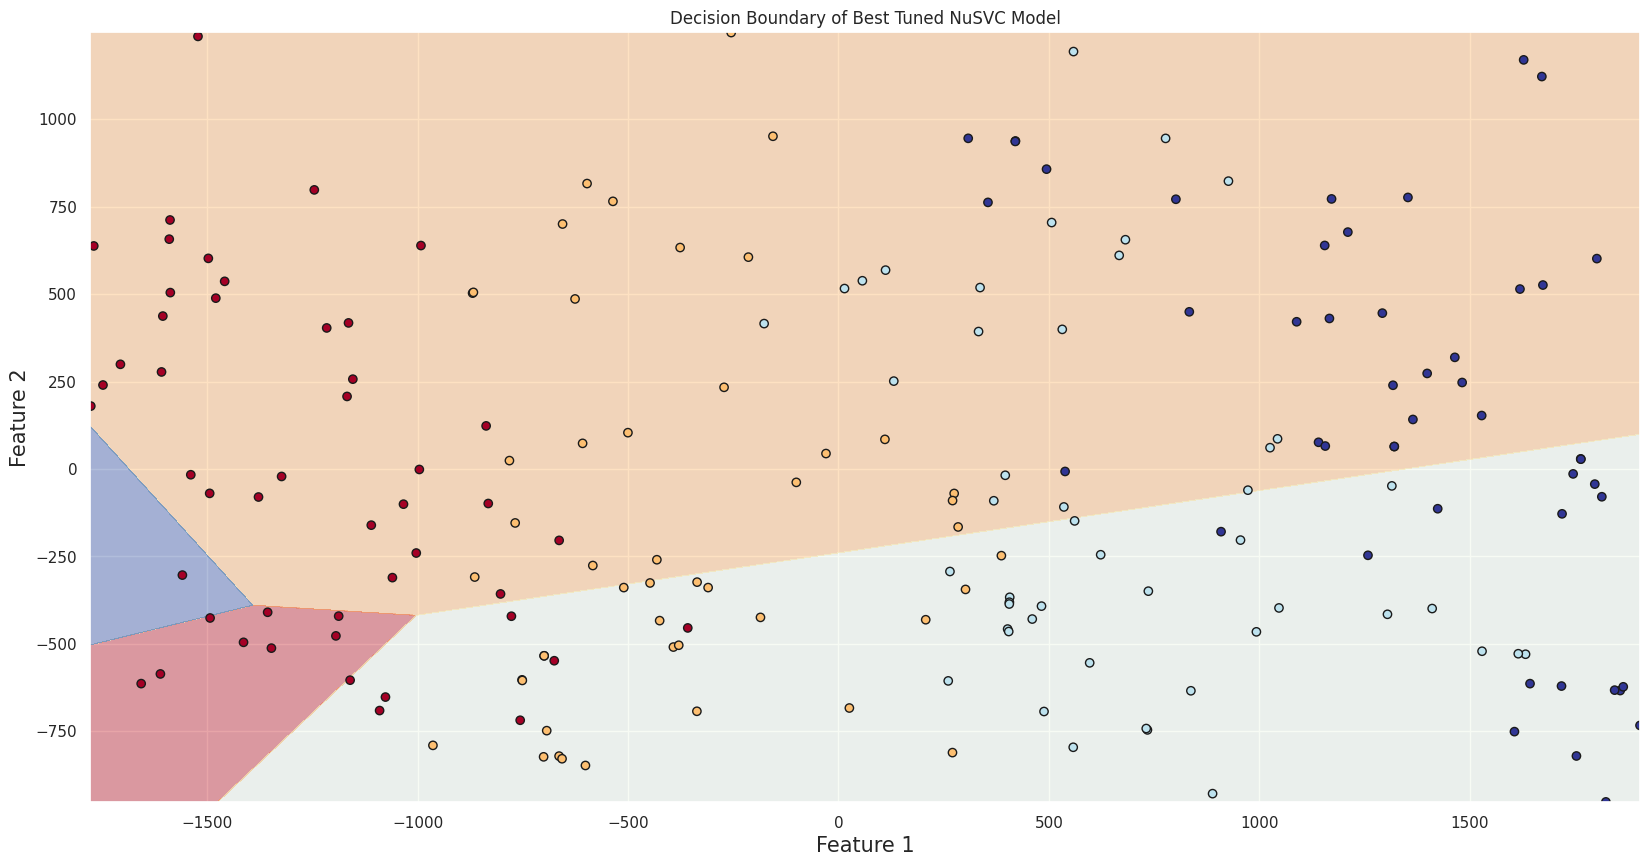

In [29]:
# Assuming x_train and y_train are already defined (60 samples, 2 features, 3 classes)
# Fit the model (this part doesn't change much as NuSVC memory usage is minimal)
#best_model = NuSVC(
#    nu=0.5609036337798153,
#    kernel='linear',
#    degree=2,
#    gamma="scale",
#    random_state=42
#)
best_model.fit(x_train, y_train)

# Create a mesh grid with larger step size to reduce memory usage
x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
step_size = 0.5  # Increased from 0.1 to 0.5 to reduce grid points
xx, yy = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))

# Predict on the mesh grid in one step to avoid redundant copies
grid_points = np.stack([xx.ravel(), yy.ravel()], axis=1)  # More memory-efficient than np.c_
Z = best_model.predict(grid_points)
Z = Z.reshape(xx.shape)

# Plot decision boundary and data points
plt.figure(figsize=(20, 10))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=plt.cm.RdYlBu, edgecolors='k')
plt.title('Decision Boundary of Best Tuned NuSVC Model')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

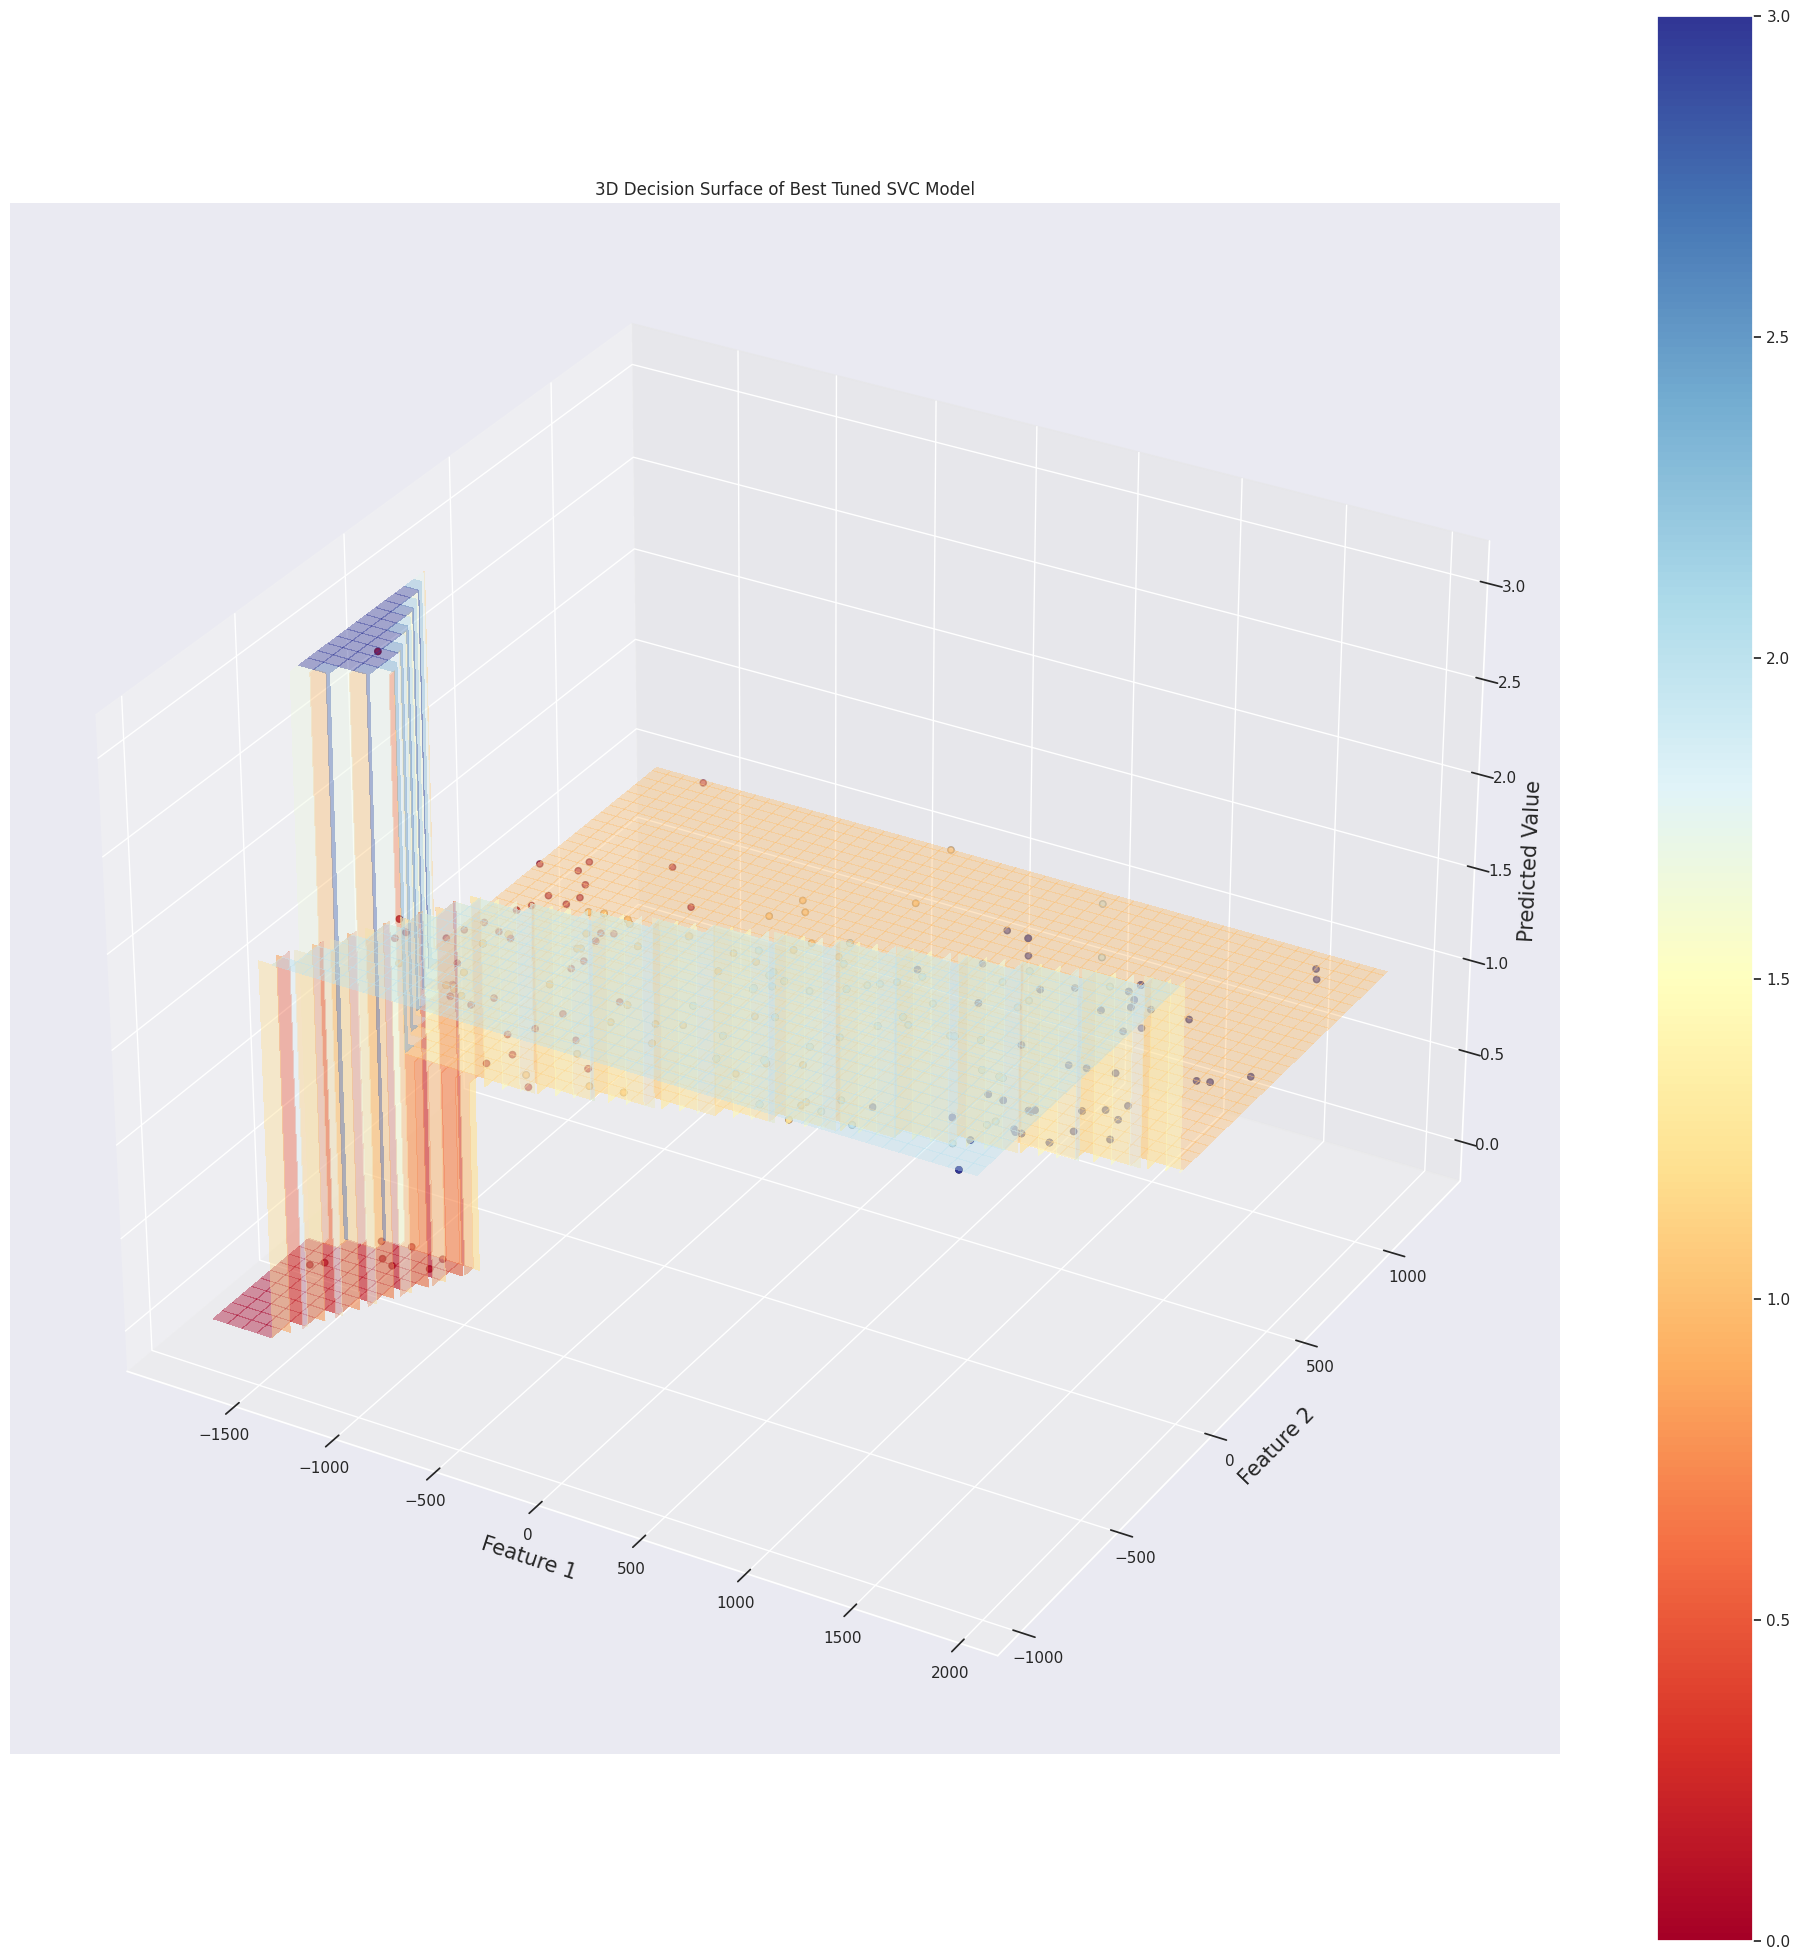

In [30]:
# Create a mesh grid with larger step size to reduce memory usage
x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
step_size = 0.5  # Increased from 0.1 to 0.5 to reduce grid points
xx, yy = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))

# Predict on the mesh grid in one step to avoid redundant copies
grid_points = np.stack([xx.ravel(), yy.ravel()], axis=1)
Z = best_model.predict(grid_points)
Z = Z.reshape(xx.shape)

# Create 3D plot
fig = plt.figure(figsize=(25, 25))
ax = fig.add_subplot(111, projection='3d')

# Plot the decision surface
surf = ax.plot_surface(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.4, linewidth=0, antialiased=False)

# Predict Z values for training data to scatter
Z_train = best_model.predict(x_train)
ax.scatter(x_train[:, 0], x_train[:, 1], Z_train, c=y_train, cmap=plt.cm.RdYlBu, edgecolors='k')

# Add labels and title
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Predicted Value')
ax.set_title('3D Decision Surface of Best Tuned SVC Model')

# Add a color bar for the scatter points
plt.colorbar(ax.scatter(x_train[:, 0], x_train[:, 1], Z_train, c=y_train, cmap=plt.cm.RdYlBu))

plt.show()

# Model Evaluation

## Classification metrics and classification reports evaluation¶

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ensure best_model is initialized with probability=True (assuming SVC or NuSVC)
from sklearn.svm import SVC  # Assuming best_model is SVC, adjust if different
best_model = SVC(probability=True, random_state=42)  # Reinitialize or refit with probability=True
best_model.fit(x_train, y_train)  # Refit the model

# Make predictions on the test data
y_pred = best_model.predict(x_test)

# Calculate metrics
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=1)
recall = recall_score(y_test, y_pred, average='macro', zero_division=1)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=1)

# Calculate predicted probabilities
y_pred_proba = best_model.predict_proba(x_test)
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovo')  # OVO for multiclass

# Print the results
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")
print(f"AUC-ROC: {roc_auc:.3f}")

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

Accuracy: 0.850
Precision: 0.854
Recall: 0.867
F1-score: 0.856
AUC-ROC: 0.974

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        11
           1       0.82      0.75      0.78        12
           2       0.78      1.00      0.88         7
           3       1.00      0.90      0.95        10

    accuracy                           0.85        40
   macro avg       0.85      0.87      0.86        40
weighted avg       0.86      0.85      0.85        40



## Confusion matrix


Class distribution in y_test: [11 12  7 10]
Class distribution in y_pred: [11 11  9  9]


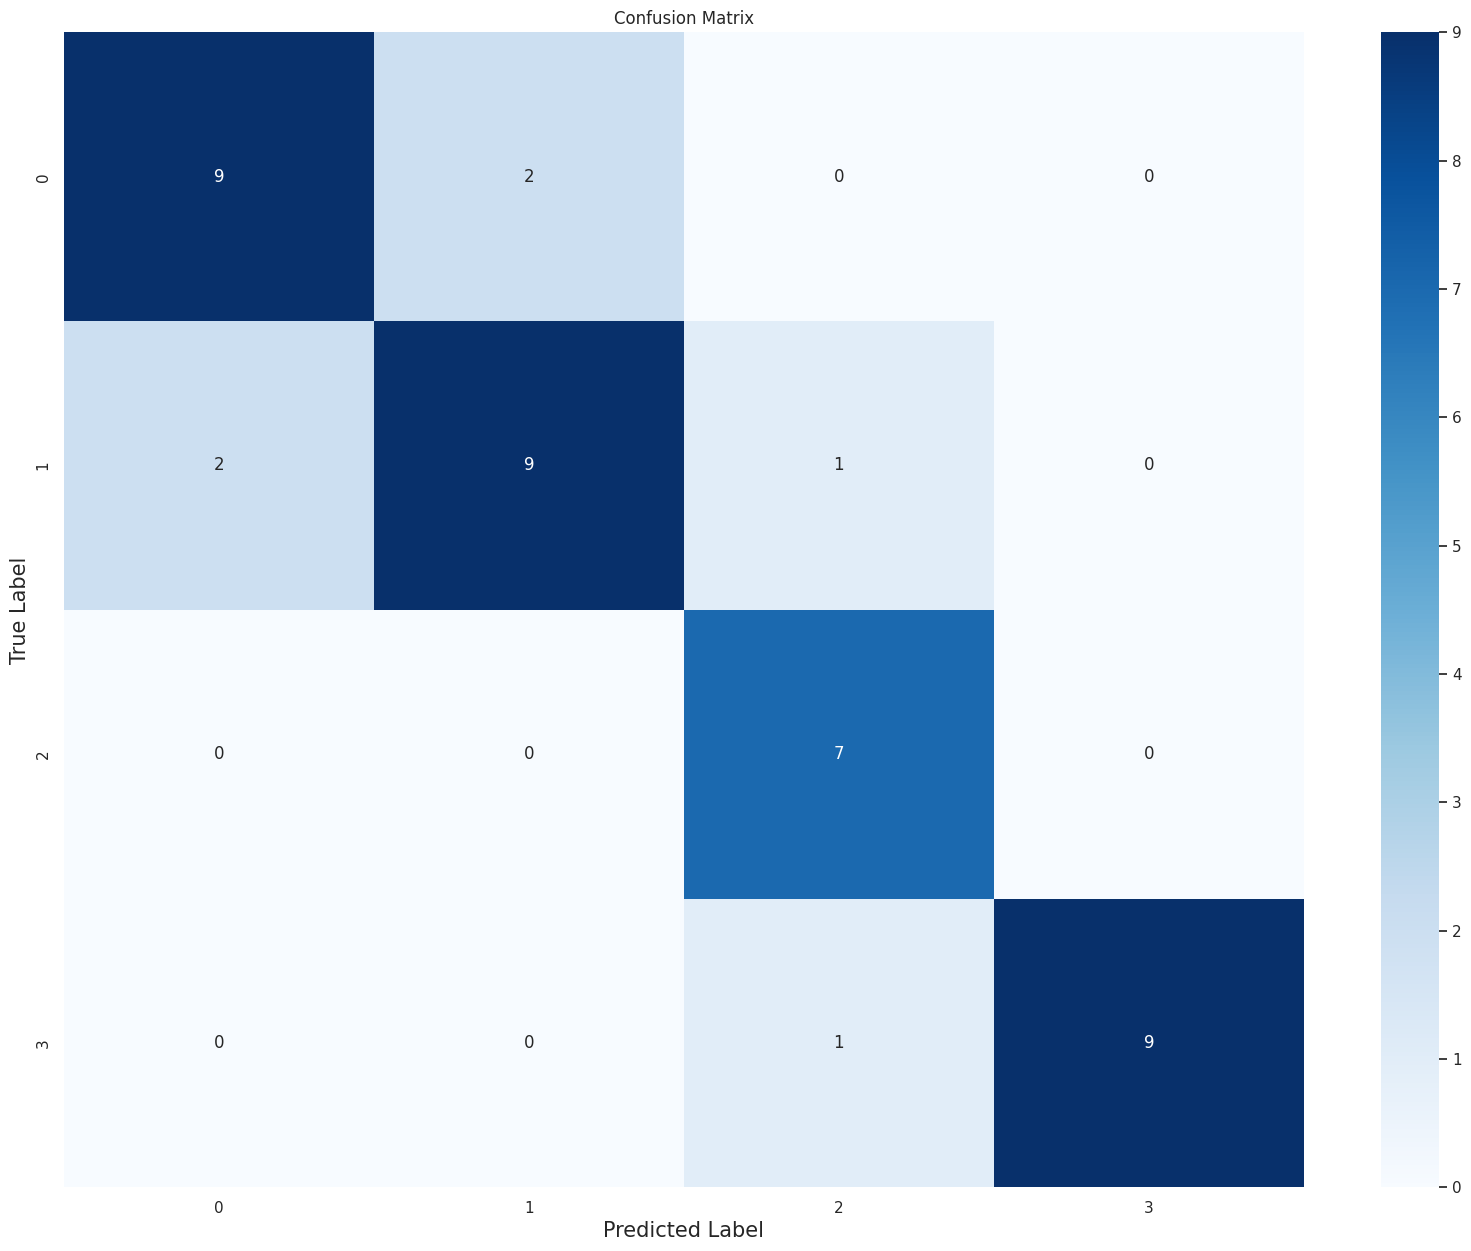

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Check class distribution in y_test and y_pred
print("\nClass distribution in y_test:", np.bincount(y_test))
print("Class distribution in y_pred:", np.bincount(y_pred))\

# Optional: Visualize the confusion matrix
plt.figure(figsize=(20, 15))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

## ROC AUC Curve


------------------------------------------------------------------------------------------------------------------------------------------------------
1 AUC: 0.9749

------------------------------------------------------------------------------------------------------------------------------------------------------
2 AUC: 0.9375

------------------------------------------------------------------------------------------------------------------------------------------------------
3 AUC: 0.9870

------------------------------------------------------------------------------------------------------------------------------------------------------


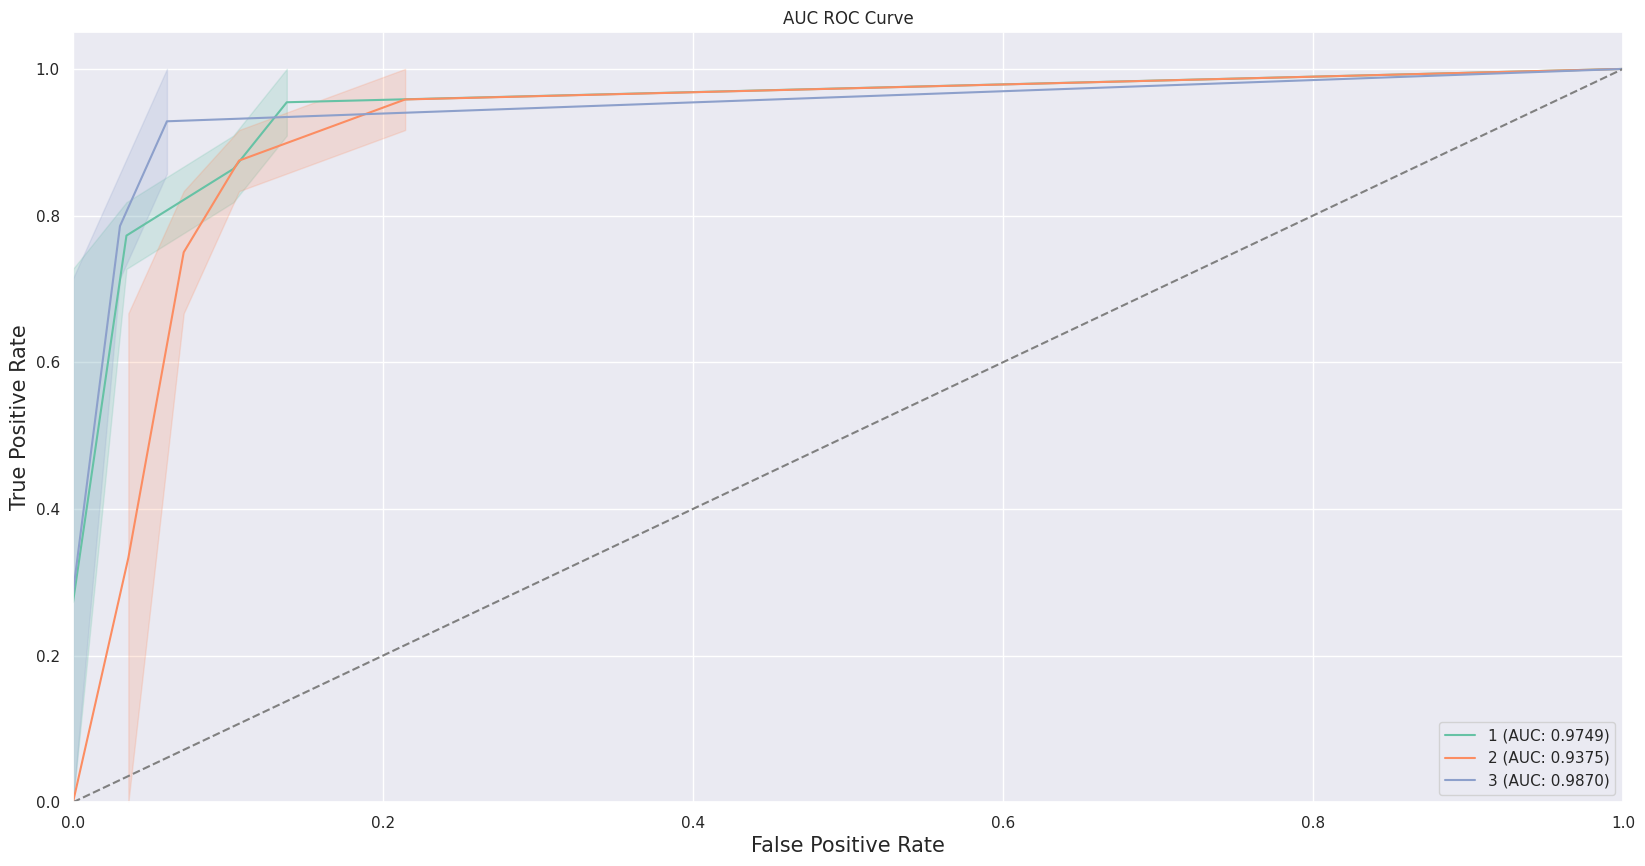

In [33]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Make predictions on the test data
y_pred = best_model.predict_proba(x_test)

# Define class labels
class_labels = ["1", "2", "3"]
# Binarize the true labels for multi-class (one-vs-rest)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # Adjusted to match the 3 classes

# Initialize ROC curve and AUC dictionaries
fpr = dict()
tpr = dict()
roc_auc = dict()

# Loop over each class and calculate the ROC curve and AUC score
for i, class_label in enumerate(class_labels):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred[:, i])
    # Check and replace inf values with NaN
    fpr[i] = np.where(np.isinf(fpr[i]), np.nan, fpr[i])
    tpr[i] = np.where(np.isinf(tpr[i]), np.nan, tpr[i])
    # Remove NaN values (though unlikely with roc_curve)
    mask = ~np.isnan(fpr[i]) & ~np.isnan(tpr[i])
    fpr[i] = fpr[i][mask]
    tpr[i] = tpr[i][mask]
    roc_auc[i] = auc(fpr[i], tpr[i])

# Create a new figure using Seaborn
plt.figure(figsize=(20, 10))

# Set Seaborn color palette
sns.set_palette("Set2")

# Plot ROC curve for each class
for i, class_label in enumerate(class_labels):
    sns.lineplot(x=fpr[i], y=tpr[i], label=f'{class_label} (AUC: {roc_auc[i]:.4f})')

# Plot the random guessing line (optional)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC ROC Curve')
plt.legend(loc="lower right")

# Show AUC values for each class
for i, class_label in enumerate(class_labels):
    print()
    print('-' * 150)
    print(f"{class_label} AUC: {roc_auc[i]:.4f}")
print()
print('-' * 150)
plt.show()

## Decision Boundary on Test dataset (2D)

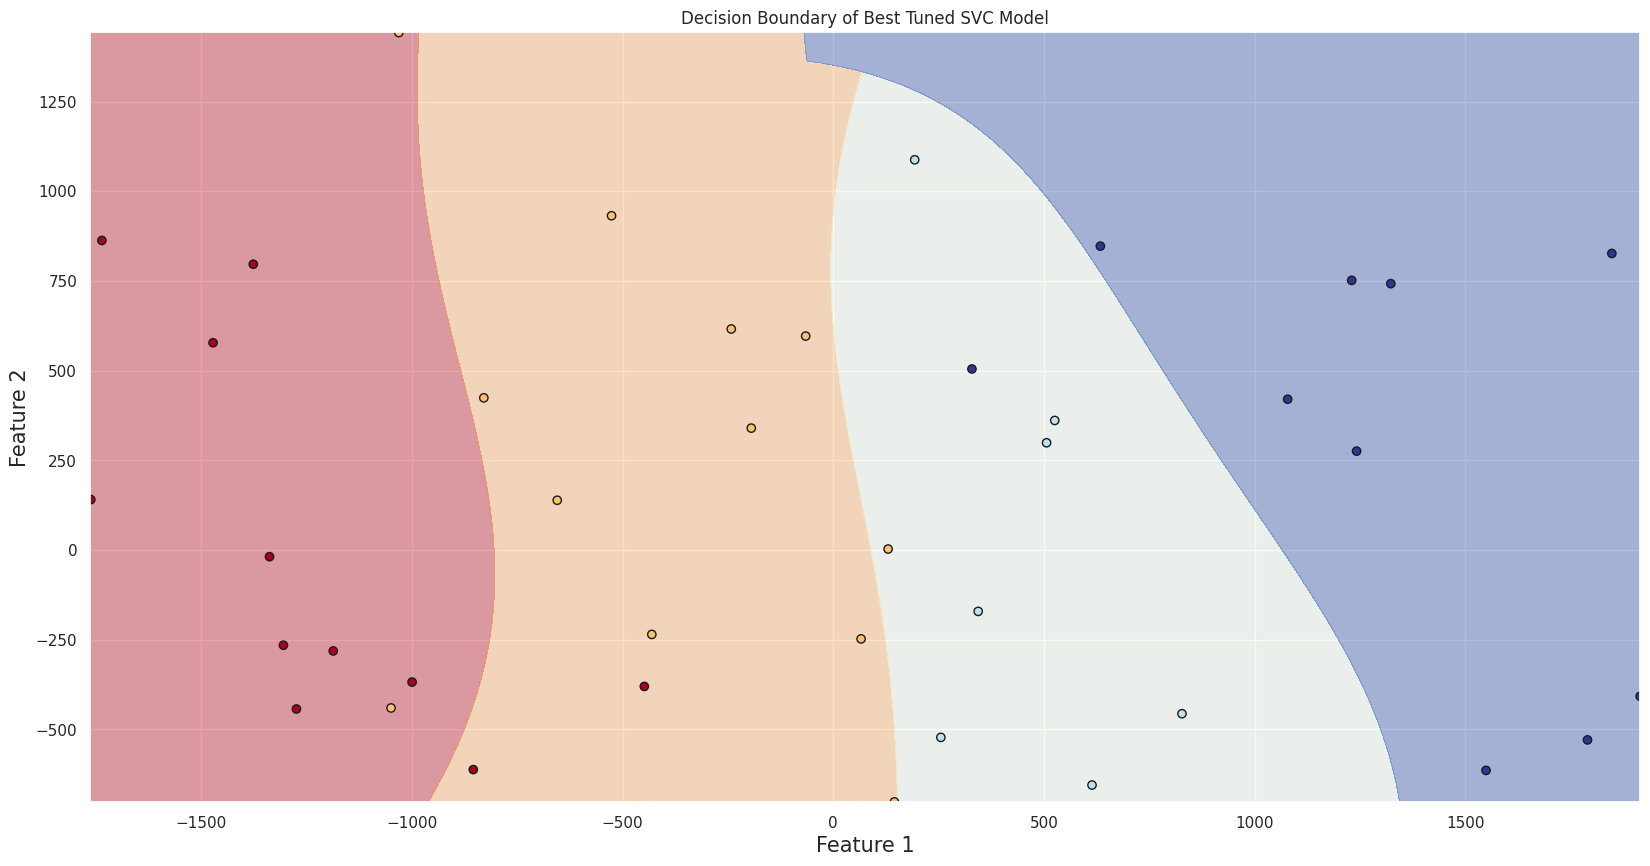

In [34]:
# Create a mesh grid with a larger step size to reduce memory usage
step_size = 0.5  # Increased from 0.1 to 0.5
x_min, x_max = x_test[:, 0].min() - 1, x_test[:, 0].max() + 1
y_min, y_max = x_test[:, 1].min() - 1, x_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))

# Predict on the mesh grid in a memory-efficient way
xy = np.vstack([xx.ravel(), yy.ravel()]).T  # Combine ravel and stacking
Z = best_model.predict(xy).reshape(xx.shape)

# Plot decision boundary and data points
plt.figure(figsize=(20, 10))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap=plt.cm.RdYlBu, edgecolors='k')  # Fixed scatter to use x_test consistently
plt.title('Decision Boundary of Best Tuned SVC Model')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## Decision Boundary on Test dataset (3D)

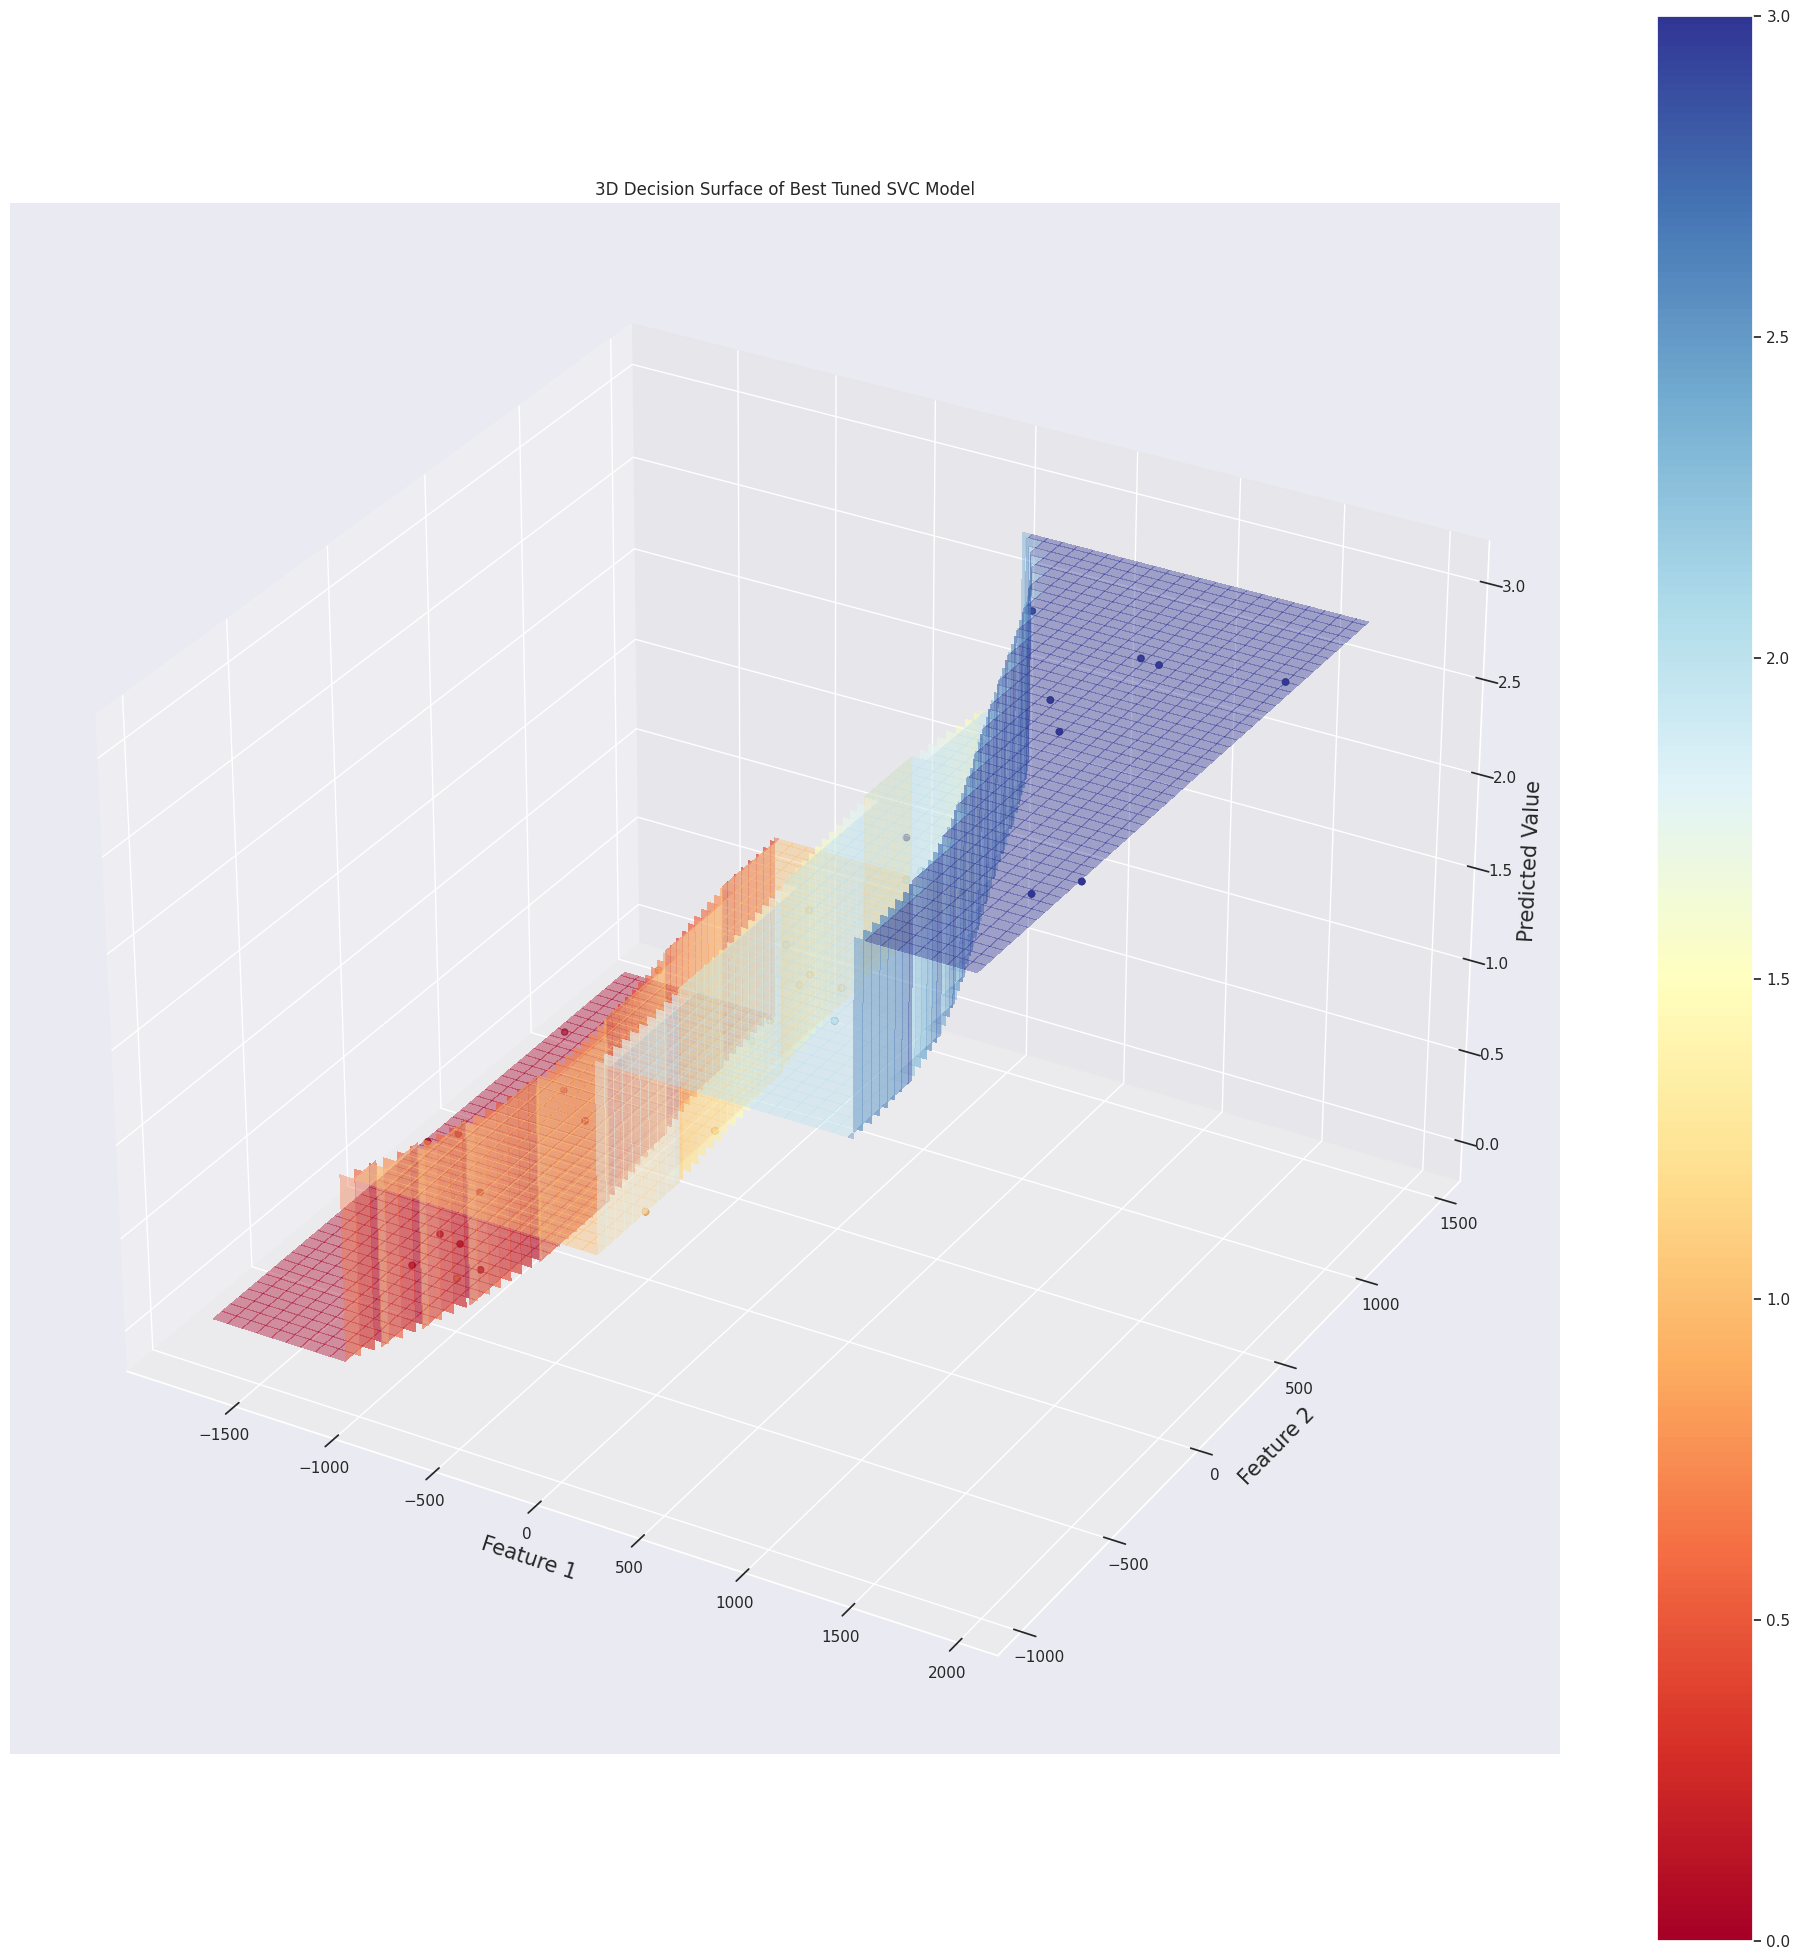

In [35]:
# Create a mesh grid with larger step size to reduce memory usage
x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
step_size = 0.5  # Increased from 0.1 to 0.5 to reduce grid points
xx, yy = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))

# Predict on the mesh grid in one step to avoid redundant copies
grid_points = np.stack([xx.ravel(), yy.ravel()], axis=1)
Z = best_model.predict(grid_points)
Z = Z.reshape(xx.shape)

# Create 3D plot
fig = plt.figure(figsize=(25, 25))
ax = fig.add_subplot(111, projection='3d')

# Plot the decision surface
surf = ax.plot_surface(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.4, linewidth=0, antialiased=False)

# Predict Z values for training data to scatter
Z_test = best_model.predict(x_test)
ax.scatter(x_test[:, 0], x_test[:, 1], Z_test, c=y_test, cmap=plt.cm.RdYlBu, edgecolors='k')

# Add labels and title
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Predicted Value')
ax.set_title('3D Decision Surface of Best Tuned SVC Model')

# Add a color bar for the scatter points
plt.colorbar(ax.scatter(x_test[:, 0], x_test[:, 1], Z_test, c=y_test, cmap=plt.cm.RdYlBu))

plt.show()